In [1]:
import pandas as pd
import numpy as np

In [2]:
train_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_train_1_group.csv')

In [3]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str) 

In [4]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target'], axis=1)

In [5]:
train_1_array=np.array(train_1)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 64]=le.fit_transform(train_1_array[:,64])
train_1_array[:, 6]=le.fit_transform(train_1_array[:,6])

In [7]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [8]:
train_1=train_1.astype(float)

In [9]:
test_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_test_1_group.csv')

In [10]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str)

In [11]:
test_1=test_1.sort_values(by=['index'])

In [12]:
test_id_1=test_1[['index', 'date', 'umd']]

In [13]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)
test_1_array=np.array(test_1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 64]=le.fit_transform(test_1_array[:,64])
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [15]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [16]:
test_1=test_1.astype(float)

In [17]:
train_1

,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,PRRCK_LARG,PRRCK_MDDL,...,1day_mode_PTY,day_mode_PTY,1day_mode_SKY,day_mode_SKY,1day_sum_rain,1day_max_rain,day_sum_rain,day_max_rain,TPTP,target_1
0,1.0,2.0,0.0,82.0,0.0,0.0,2.0,0.0,2.0,25.0,...,0.0,1.0,4.0,4.0,12.0,3.0,259.0,106.0,1.0,0.0
1,1.0,2.0,0.0,82.0,0.0,0.0,2.0,0.0,2.0,25.0,...,1.0,1.0,4.0,4.0,2.0,0.0,80.0,55.0,1.0,0.0
2,1.0,2.0,0.0,82.0,0.0,0.0,2.0,0.0,2.0,25.0,...,1.0,1.0,4.0,4.0,60.0,13.0,74.0,43.0,1.0,0.0
3,1.0,2.0,0.0,82.0,0.0,0.0,2.0,0.0,2.0,25.0,...,0.0,1.0,4.0,4.0,0.0,0.0,121.0,68.0,1.0,0.0
4,1.0,2.0,0.0,82.0,0.0,0.0,2.0,0.0,2.0,25.0,...,0.0,1.0,2.0,4.0,45.0,40.0,110.0,70.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,1.0,2.0,1.0,11.0,4.0,4.0,1.0,10.0,2.0,24.0,...,0.0,0.0,4.0,4.0,0.0,0.0,40.0,20.0,13.0,0.0
6189,1.0,2.0,1.0,11.0,4.0,4.0,1.0,10.0,2.0,24.0,...,1.0,1.0,4.0,4.0,160.0,40.0,140.0,70.0,13.0,0.0
6190,1.0,2.0,1.0,11.0,4.0,4.0,1.0,10.0,2.0,24.0,...,1.0,1.0,4.0,4.0,100.0,40.0,160.0,40.0,13.0,0.0
6191,1.0,2.0,1.0,11.0,4.0,4.0,1.0,10.0,2.0,24.0,...,0.0,1.0,4.0,4.0,15.0,10.0,220.0,70.0,13.0,0.0


In [18]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [20]:
# IsolationForest 모델 만들기
isol = IsolationForest(max_samples=100, random_state=200) 

# 만들어 둔 데이터셋에 알고리즘 피팅시키기
isol.fit(X_features)
y_pred= isol.predict(X_features)

In [21]:
isola=pd.DataFrame(y_pred, columns= ['isal'])

In [22]:
train_1=train_1.join(isola, how='inner')

In [23]:
train_1=train_1[train_1['isal']== 1]

In [24]:
train_1=train_1.drop(['isal'], axis=1)

In [25]:
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [26]:
# shuffle1
import sklearn
x_shuffled1 = sklearn.utils.shuffle(X_features, random_state=2021)
y_shuffled1 =sklearn.utils.shuffle(y_label, random_state=2021)
X_train1, X_test1, y_train1, y_test1=train_test_split(x_shuffled1, y_shuffled1, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train1.shape, X_test1.shape)

(3416, 65) (1464, 65)


In [27]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train1, y_train1)

In [28]:
# shuffle2
import sklearn
x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=2022)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=2022)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(3416, 65) (1464, 65)


In [29]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [30]:
# shuffle3
import sklearn
x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=2023)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=2023)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(3416, 65) (1464, 65)


In [31]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3= smote_nc.fit_resample(X_train3, y_train3)

In [32]:
# shuffle4
import sklearn
x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=2024)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=2024)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(3416, 65) (1464, 65)


In [33]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4= smote_nc.fit_resample(X_train4, y_train4)

In [34]:
# shuffle5
import sklearn
x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=2025)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=2025)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(3416, 65) (1464, 65)


In [35]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5= smote_nc.fit_resample(X_train5, y_train5)

In [36]:
# shuffle6
import sklearn
x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=2026)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=2026)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(3416, 65) (1464, 65)


In [37]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6= smote_nc.fit_resample(X_train6, y_train6)

In [38]:
# shuffle7
import sklearn
x_shuffled7 = sklearn.utils.shuffle(X_features, random_state=2027)
y_shuffled7 =sklearn.utils.shuffle(y_label, random_state=2027)
X_train7, X_test7, y_train7, y_test7=train_test_split(x_shuffled7, y_shuffled7, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train7.shape, X_test7.shape)

(3416, 65) (1464, 65)


In [39]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled7, y_resampled7= smote_nc.fit_resample(X_train7, y_train7)

In [40]:
# shuffle8
import sklearn
x_shuffled8 = sklearn.utils.shuffle(X_features, random_state=2028)
y_shuffled8 =sklearn.utils.shuffle(y_label, random_state=2028)
X_train8, X_test8, y_train8, y_test8=train_test_split(x_shuffled8, y_shuffled8, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train8.shape, X_test8.shape)

(3416, 65) (1464, 65)


In [41]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled8, y_resampled8= smote_nc.fit_resample(X_train8, y_train8)

In [42]:
# shuffle9
import sklearn
x_shuffled9 = sklearn.utils.shuffle(X_features, random_state=2029)
y_shuffled9 =sklearn.utils.shuffle(y_label, random_state=2029)
X_train9, X_test9, y_train9, y_test9=train_test_split(x_shuffled9, y_shuffled9, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train9.shape, X_test9.shape)

(3416, 65) (1464, 65)


In [43]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled9, y_resampled9= smote_nc.fit_resample(X_train9, y_train9)

In [44]:
# shuffle10
import sklearn
x_shuffled10 = sklearn.utils.shuffle(X_features, random_state=2030)
y_shuffled10 =sklearn.utils.shuffle(y_label, random_state=2030)
X_train10, X_test10, y_train10, y_test10=train_test_split(x_shuffled10, y_shuffled10, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train10.shape, X_test10.shape)

(3416, 65) (1464, 65)


In [45]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled10, y_resampled10= smote_nc.fit_resample(X_train10, y_train10)

In [46]:
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [47]:
# model1 베이지안 최적화1
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain1 = xgb.DMatrix(data=X_resampled1, label=y_resampled1)
dtest1 = xgb.DMatrix(data=X_test1, label=y_test1)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain1, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9974   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9973   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9971   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9975   |  0.5867   |  0.29     |  0.9826   |  5.253    |  7.127    |  0.9551   |
|  5        |  0.9972   |  0.4377   |  0.2599   |  0.9967   |  5.758    |  7.294    |  0.7108   |
|  6        |  0.9954   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9972   |  0.5412   |  0.3      |  0.9732   |  4.816    |  7.534    |  0.8657   |
|  8        |  0.9972   |  0.3992   |  0.138    |  0.4643   |  6.583    |  6.879    |  0.7572   |


[00:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.52375	eval-logloss:0.54002
[1]	train-logloss:0.41728	eval-logloss:0.44481
[2]	train-logloss:0.33772	eval-logloss:0.38233
[3]	train-logloss:0.29324	eval-logloss:0.35048
[4]	train-logloss:0.25082	eval-logloss:0.31402
[5]	train-logloss:0.21984	eval-logloss:0.28796
[6]	train-logloss:0.19411	eval-logloss:0.26788
[7]	train-logloss:0.17466	eval-logloss:0.25378
[8]	train-logloss:0.15746	eval-logloss:0.23978
[9]	train-logloss:0.14437	eval-logloss:0.22731
[10]	train-logloss:0.13409	eval-logloss:0.21774
[11]	train-logloss:0.12176	eval-logloss:0.20522
[12]	train-logloss:0.11255	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

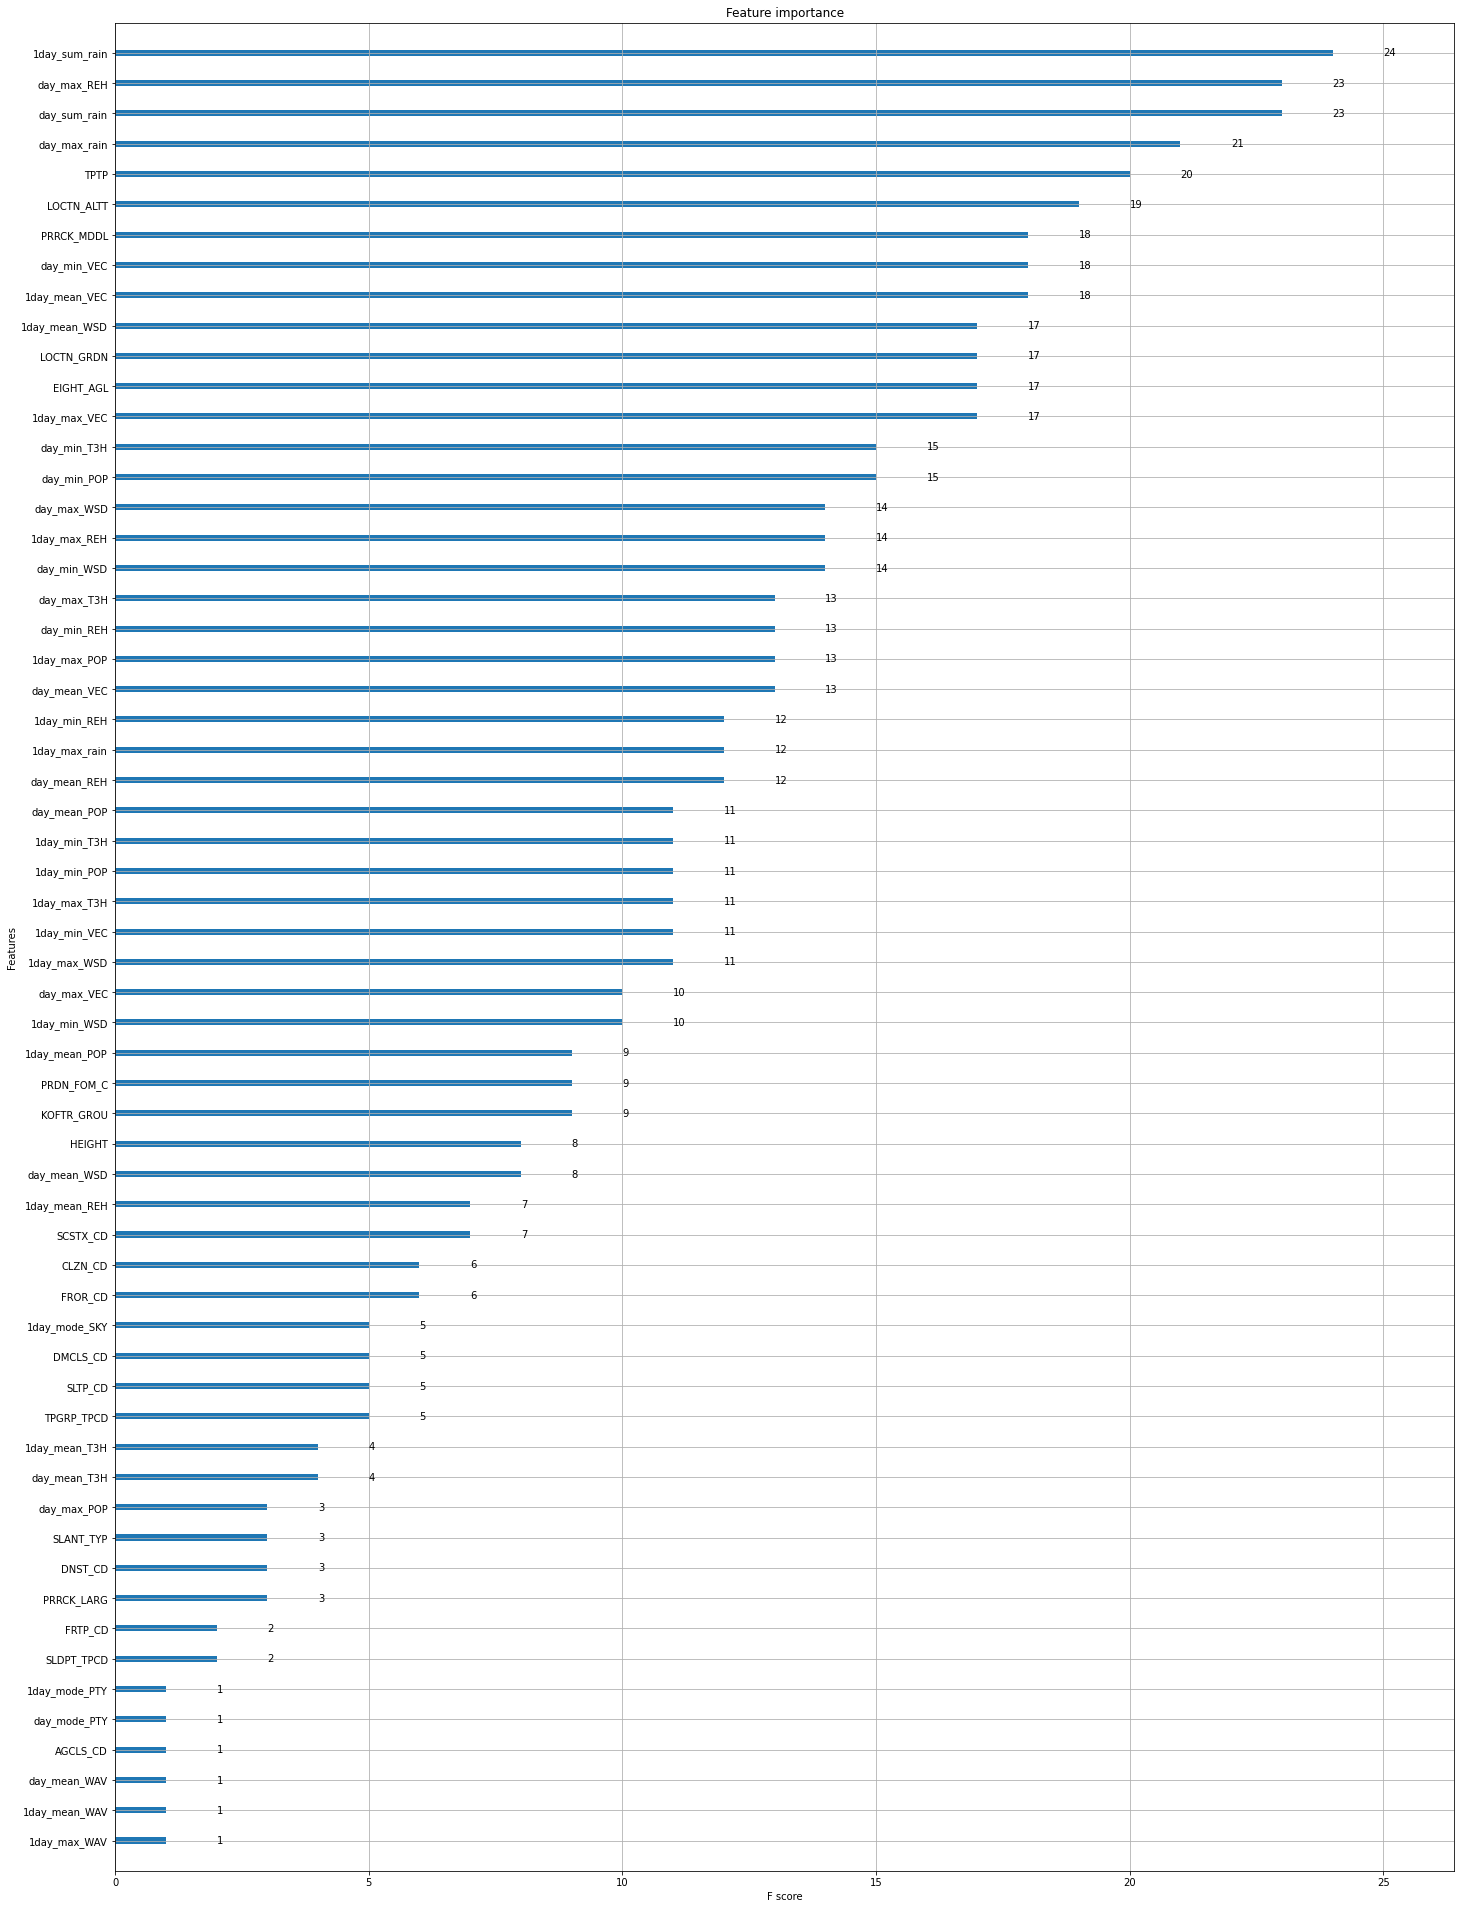

In [48]:
# model1
params = {'max_depth': 5,
         'eta': 0.29,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.9826,
         'colsample_bytree':0.5867,
         'min_child_weight': 7.127,
         'subsample': 0.9551
         }
num_rounds = 500

wlist = [(dtrain1, 'train'),(dtest1, 'eval')]
xgb_ab1 =xgb.train(params = params, dtrain=dtrain1, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab1, ax=ax)

In [49]:
# model2 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain2 = xgb.DMatrix(data=X_resampled2, label=y_resampled2)
dtest2 = xgb.DMatrix(data=X_test2, label=y_test2)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain2, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9971   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9968   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9967   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9934   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9969   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9947   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9967   |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.9969   |  0.3002   |  0.1209   |  0.1746   |  6.925    |  6.254    |  0.856    |


[00:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.54669	eval-logloss:0.55445
[1]	train-logloss:0.46253	eval-logloss:0.47072
[2]	train-logloss:0.39072	eval-logloss:0.40496
[3]	train-logloss:0.34712	eval-logloss:0.36728
[4]	train-logloss:0.30456	eval-logloss:0.32830
[5]	train-logloss:0.27083	eval-logloss:0.30095
[6]	train-logloss:0.24516	eval-logloss:0.27986
[7]	train-logloss:0.22105	eval-logloss:0.25859
[8]	train-logloss:0.20123	eval-logloss:0.24200
[9]	train-logloss:0.18569	eval-logloss:0.22859
[10]	train-logloss:0.17638	eval-logloss:0.21944
[11]	train-logloss:0.16531	eval-logloss:0.21046
[12]	train-logloss:0.15464	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

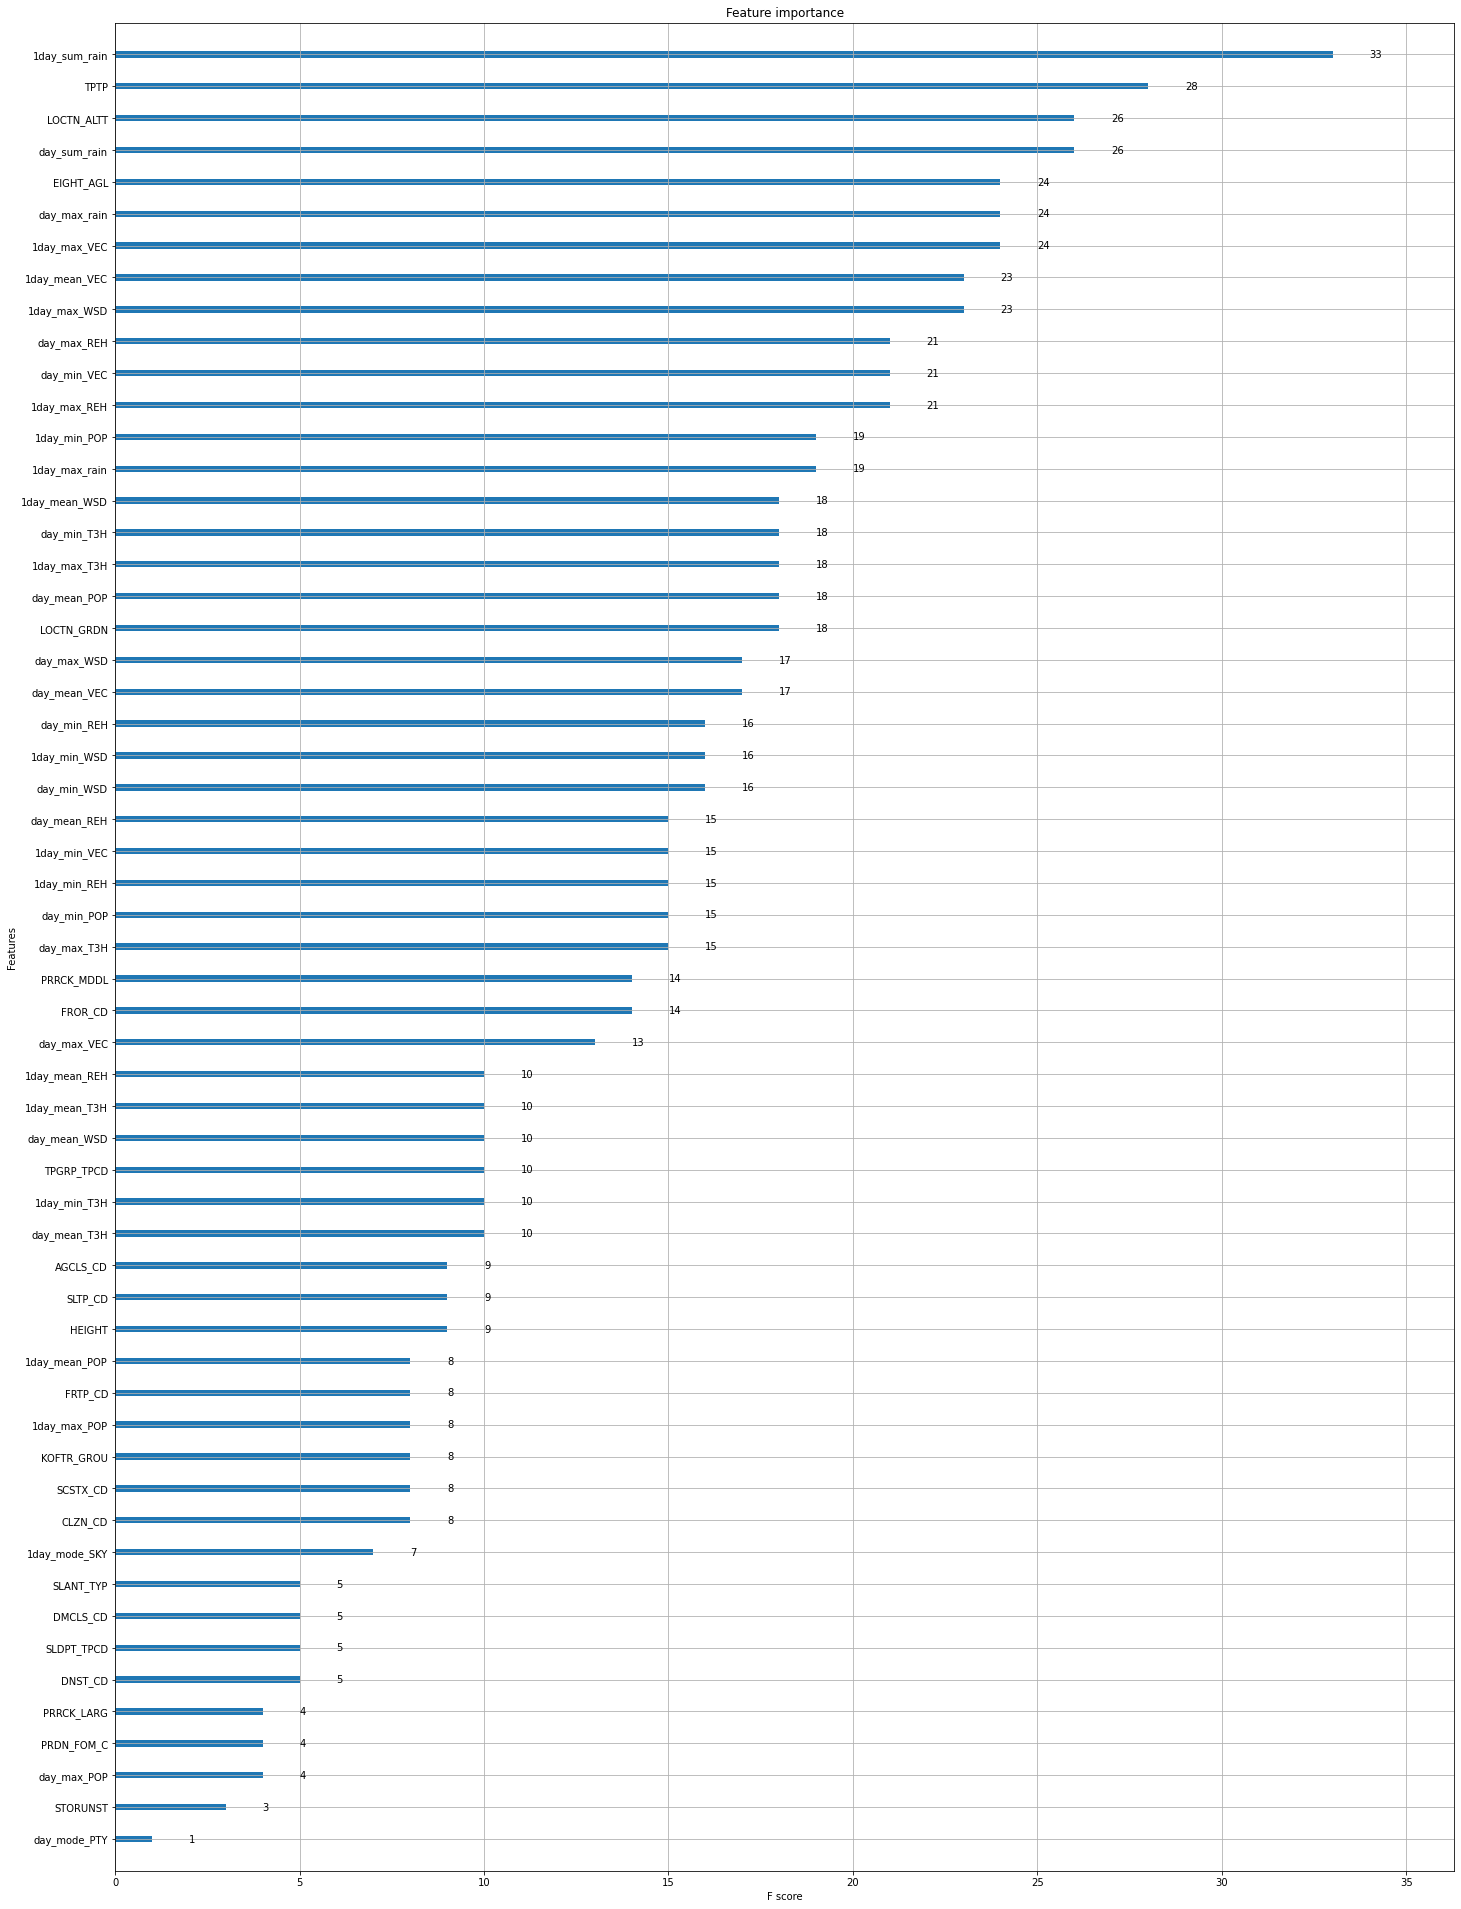

In [50]:
# model2
params = {'max_depth': 5,
         'eta': 0.243,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.6028,
         'colsample_bytree':0.6293,
         'min_child_weight': 6.695,
         'subsample': 0.8938
         }
num_rounds = 500

wlist = [(dtrain2, 'train'),(dtest2, 'eval')]
xgb_ab2 =xgb.train(params = params, dtrain=dtrain2, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab2, ax=ax)

In [51]:
# model3 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain3 = xgb.DMatrix(data=X_resampled3, label=y_resampled3)
dtest3 = xgb.DMatrix(data=X_test3, label=y_test3)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain3, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.997    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9966   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9966   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9935   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9969   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9952   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.997    |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.997    |  0.3002   |  0.1209   |  0.1746   |  6.925    |  6.254    |  0.856    |


[00:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61448	eval-logloss:0.62281
[1]	train-logloss:0.55422	eval-logloss:0.56673
[2]	train-logloss:0.49936	eval-logloss:0.51761
[3]	train-logloss:0.45154	eval-logloss:0.47672
[4]	train-logloss:0.40701	eval-logloss:0.43730
[5]	train-logloss:0.37253	eval-logloss:0.40651
[6]	train-logloss:0.33957	eval-logloss:0.37873
[7]	train-logloss:0.31341	eval-logloss:0.35847
[8]	train-logloss:0.28732	eval-logloss:0.33688
[9]	train-logloss:0.26597	eval-logloss:0.31942
[10]	train-logloss:0.24818	eval-logloss:0.30613
[11]	train-logloss:0.23198	eval-logloss:0.29227
[12]	train-logloss:0.21678	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

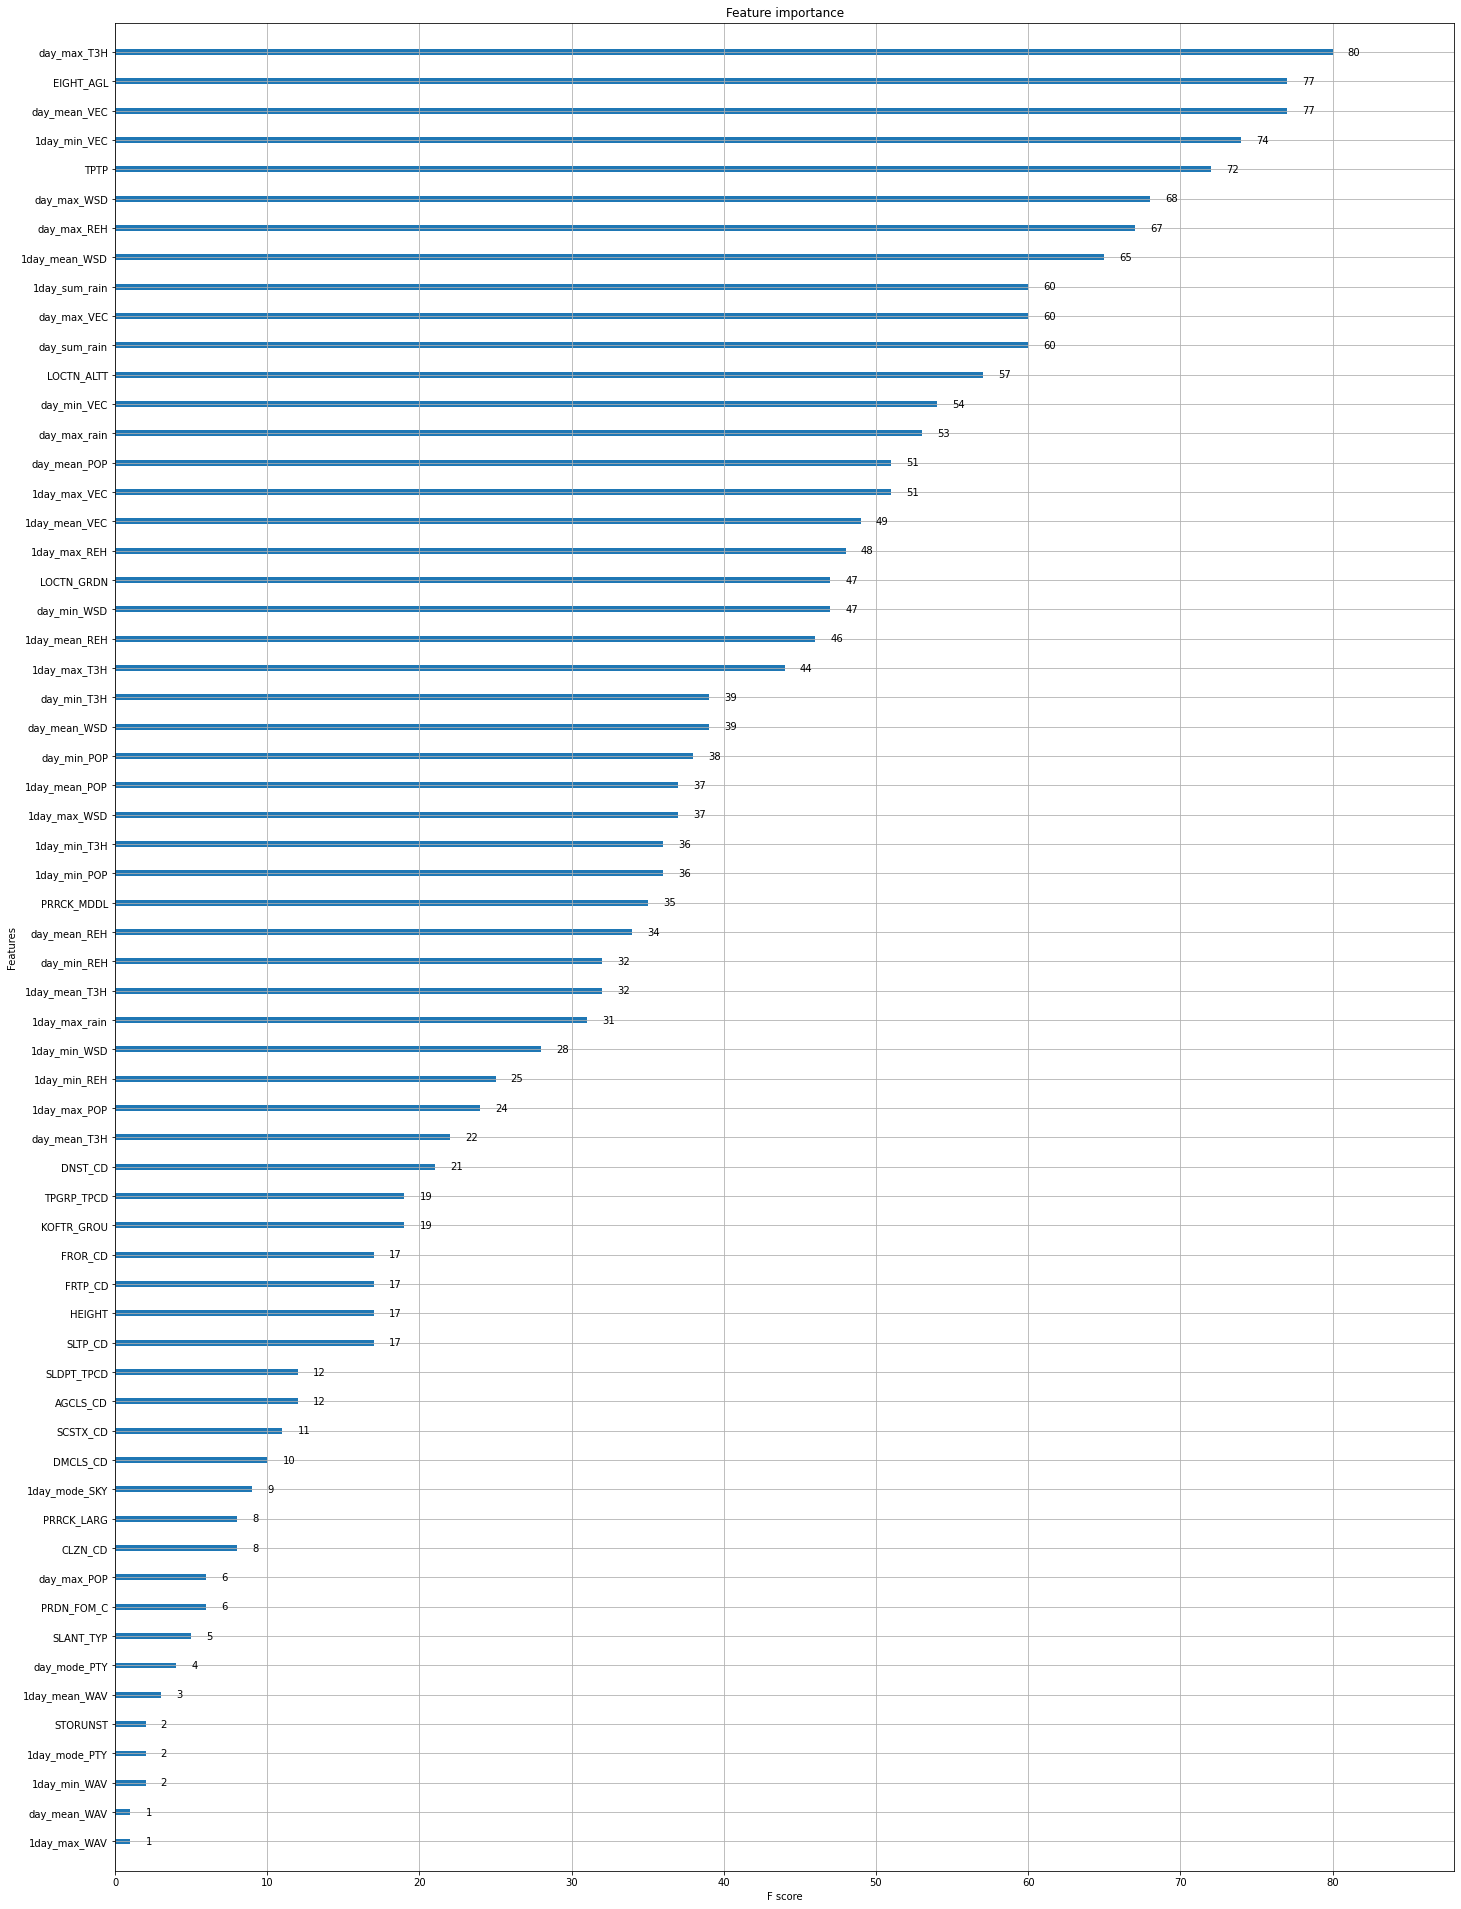

In [52]:
# model3
params = {'max_depth': 7,
         'eta': 0.1246,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.1202,
         'colsample_bytree':0.3925,
         'min_child_weight': 6.22,
         'subsample': 0.8534
         }
num_rounds = 500

wlist = [(dtrain3, 'train'),(dtest3, 'eval')]
xgb_ab3 =xgb.train(params = params, dtrain=dtrain3, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab3, ax=ax)

In [53]:
# model4 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain4 = xgb.DMatrix(data=X_resampled4, label=y_resampled4)
dtest4 = xgb.DMatrix(data=X_test4, label=y_test4)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain4, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9971   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9969   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9962   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9968   |  0.668    |  0.1483   |  0.7392   |  5.238    |  7.313    |  0.9475   |
|  5        |  0.9969   |  0.4741   |  0.1705   |  0.4832   |  5.199    |  6.424    |  0.7365   |
|  6        |  0.9945   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9968   |  0.3819   |  0.2885   |  0.8886   |  4.565    |  7.632    |  0.9234   |
|  8        |  0.9971   |  0.3992   |  0.138    |  0.4643   |  6.583    |  6.879    |  0.7572   |


[00:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.56592	eval-logloss:0.57290
[1]	train-logloss:0.47064	eval-logloss:0.48156
[2]	train-logloss:0.40905	eval-logloss:0.42766
[3]	train-logloss:0.35861	eval-logloss:0.38025
[4]	train-logloss:0.31000	eval-logloss:0.34033
[5]	train-logloss:0.27923	eval-logloss:0.31443
[6]	train-logloss:0.24737	eval-logloss:0.28798
[7]	train-logloss:0.22778	eval-logloss:0.27232
[8]	train-logloss:0.21289	eval-logloss:0.26132
[9]	train-logloss:0.19628	eval-logloss:0.24774
[10]	train-logloss:0.18493	eval-logloss:0.24069
[11]	train-logloss:0.17378	eval-logloss:0.23167
[12]	train-logloss:0.16180	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

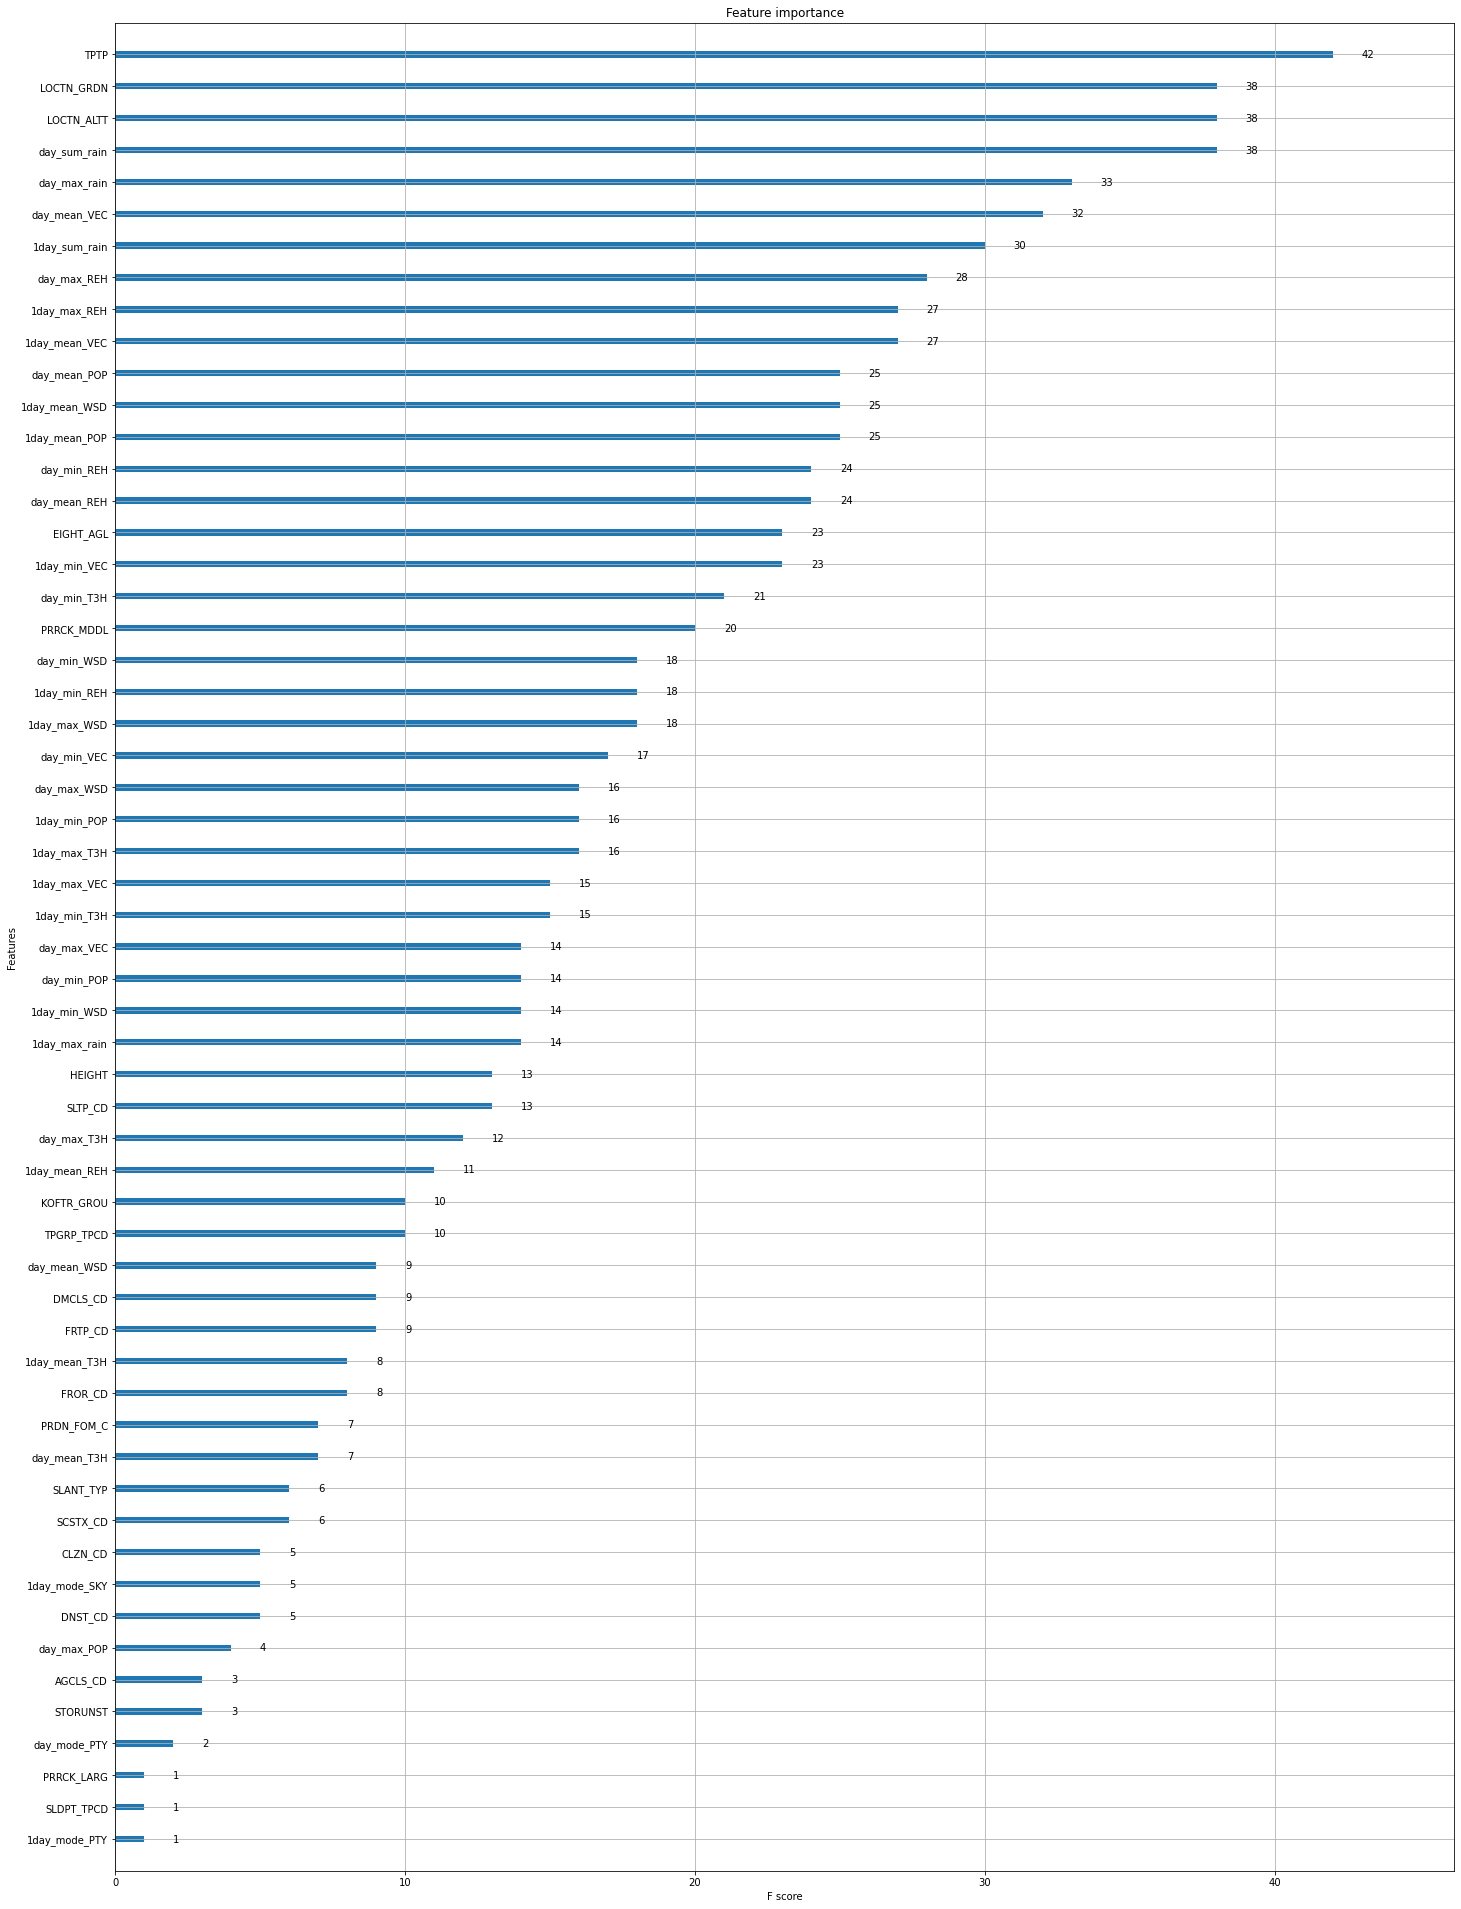

In [54]:
# model4
params = {'max_depth': 5,
         'eta': 0.243,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.6028,
         'colsample_bytree':0.6293,
         'min_child_weight': 6.695,
         'subsample': 0.8938
         }
num_rounds = 500

wlist = [(dtrain4, 'train'),(dtest4, 'eval')]
xgb_ab4 =xgb.train(params = params, dtrain=dtrain4, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab4, ax=ax)

In [55]:
# model5 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain5 = xgb.DMatrix(data=X_resampled5, label=y_resampled5)
dtest5 = xgb.DMatrix(data=X_test5, label=y_test5)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain5, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9964   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.996    |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9959   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9933   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9968   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9946   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9965   |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.9964   |  0.496    |  0.1958   |  0.0      |  6.846    |  8.005    |  0.8349   |


[00:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.57169	eval-logloss:0.58481
[1]	train-logloss:0.48482	eval-logloss:0.50398
[2]	train-logloss:0.40700	eval-logloss:0.43188
[3]	train-logloss:0.35020	eval-logloss:0.38290
[4]	train-logloss:0.31141	eval-logloss:0.34959
[5]	train-logloss:0.27295	eval-logloss:0.31806
[6]	train-logloss:0.24431	eval-logloss:0.29481
[7]	train-logloss:0.22076	eval-logloss:0.27539
[8]	train-logloss:0.19997	eval-logloss:0.26108
[9]	train-logloss:0.18425	eval-logloss:0.24915
[10]	train-logloss:0.16861	eval-logloss:0.23797
[11]	train-logloss:0.15732	eval-logloss:0.22814
[12]	train-logloss:0.14667	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

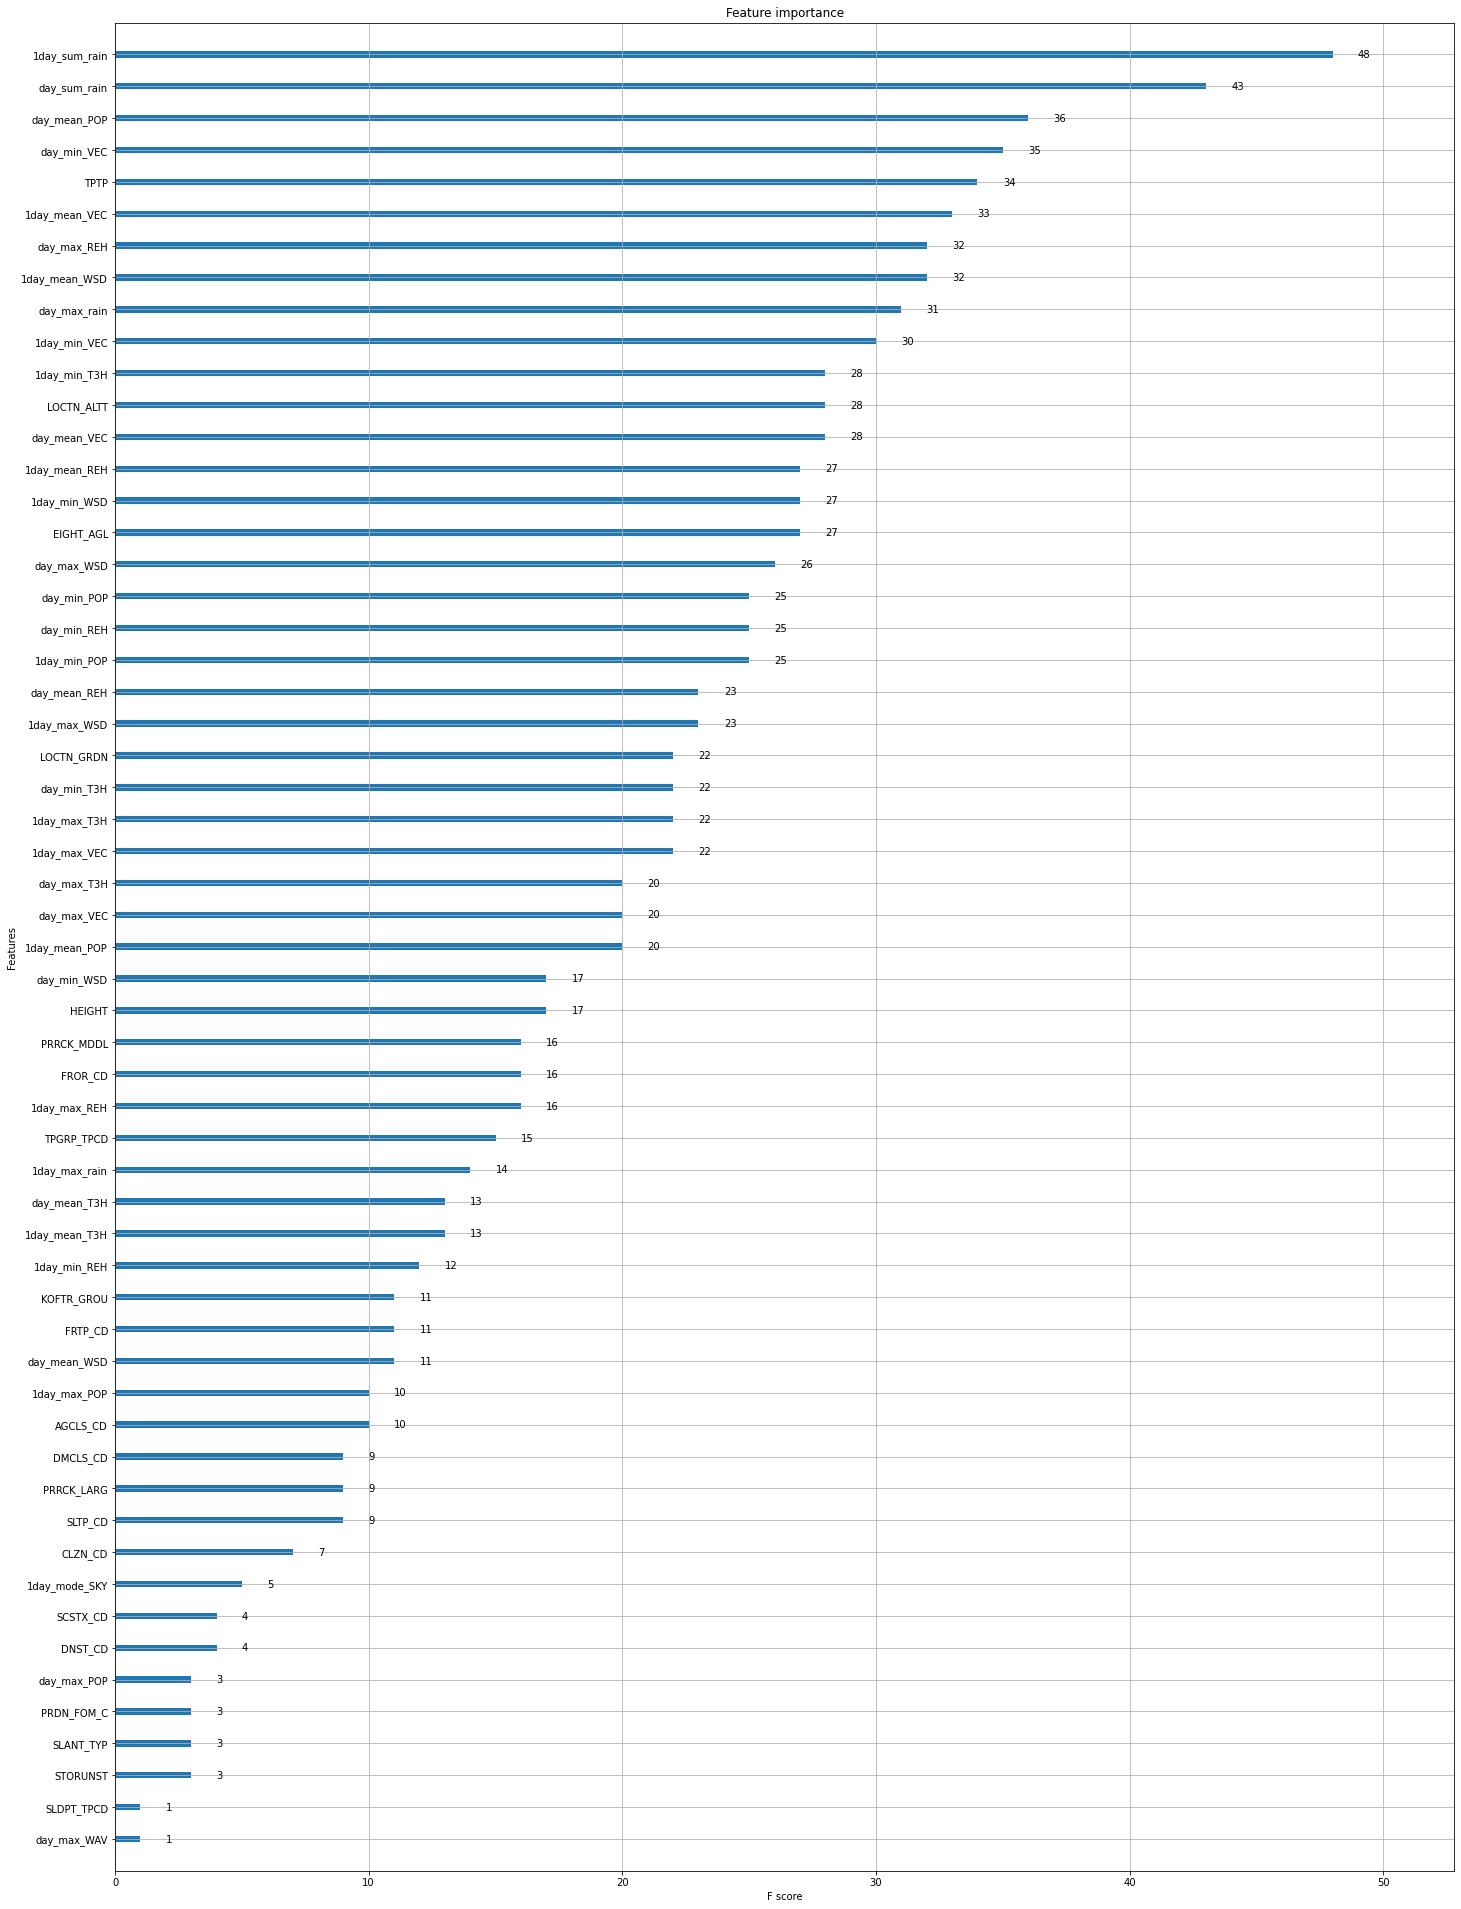

In [56]:
# model5
params = {'max_depth': 7,
         'eta': 0.2062,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.1336,
         'colsample_bytree':0.4533,
         'min_child_weight': 8.356,
         'subsample': 0.7943
         }
num_rounds = 500

wlist = [(dtrain5, 'train'),(dtest5, 'eval')]
xgb_ab5 =xgb.train(params = params, dtrain=dtrain5, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab5, ax=ax)

In [57]:
# model6 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain6 = xgb.DMatrix(data=X_resampled6, label=y_resampled6)
dtest6 = xgb.DMatrix(data=X_test6, label=y_test6)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain6, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9974   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9967   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9972   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9955   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9973   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9975   |  0.6391   |  0.2941   |  0.5651   |  5.51     |  6.948    |  0.8499   |
|  7        |  0.9975   |  0.3001   |  0.1358   |  0.968    |  6.397    |  7.406    |  0.8281   |
|  8        |  0.9976   |  0.459    |  0.2921   |  0.9312   |  6.034    |  5.884    |  0.9214   |


[00:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.52252	eval-logloss:0.53494
[1]	train-logloss:0.41331	eval-logloss:0.43733
[2]	train-logloss:0.34123	eval-logloss:0.37459
[3]	train-logloss:0.29420	eval-logloss:0.33288
[4]	train-logloss:0.24682	eval-logloss:0.29511
[5]	train-logloss:0.21176	eval-logloss:0.26729
[6]	train-logloss:0.18788	eval-logloss:0.25074
[7]	train-logloss:0.16573	eval-logloss:0.23174
[8]	train-logloss:0.14820	eval-logloss:0.22071
[9]	train-logloss:0.13396	eval-logloss:0.21006
[10]	train-logloss:0.11831	eval-logloss:0.20031
[11]	train-logloss:0.10540	eval-logloss:0.19127
[12]	train-logloss:0.09783	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

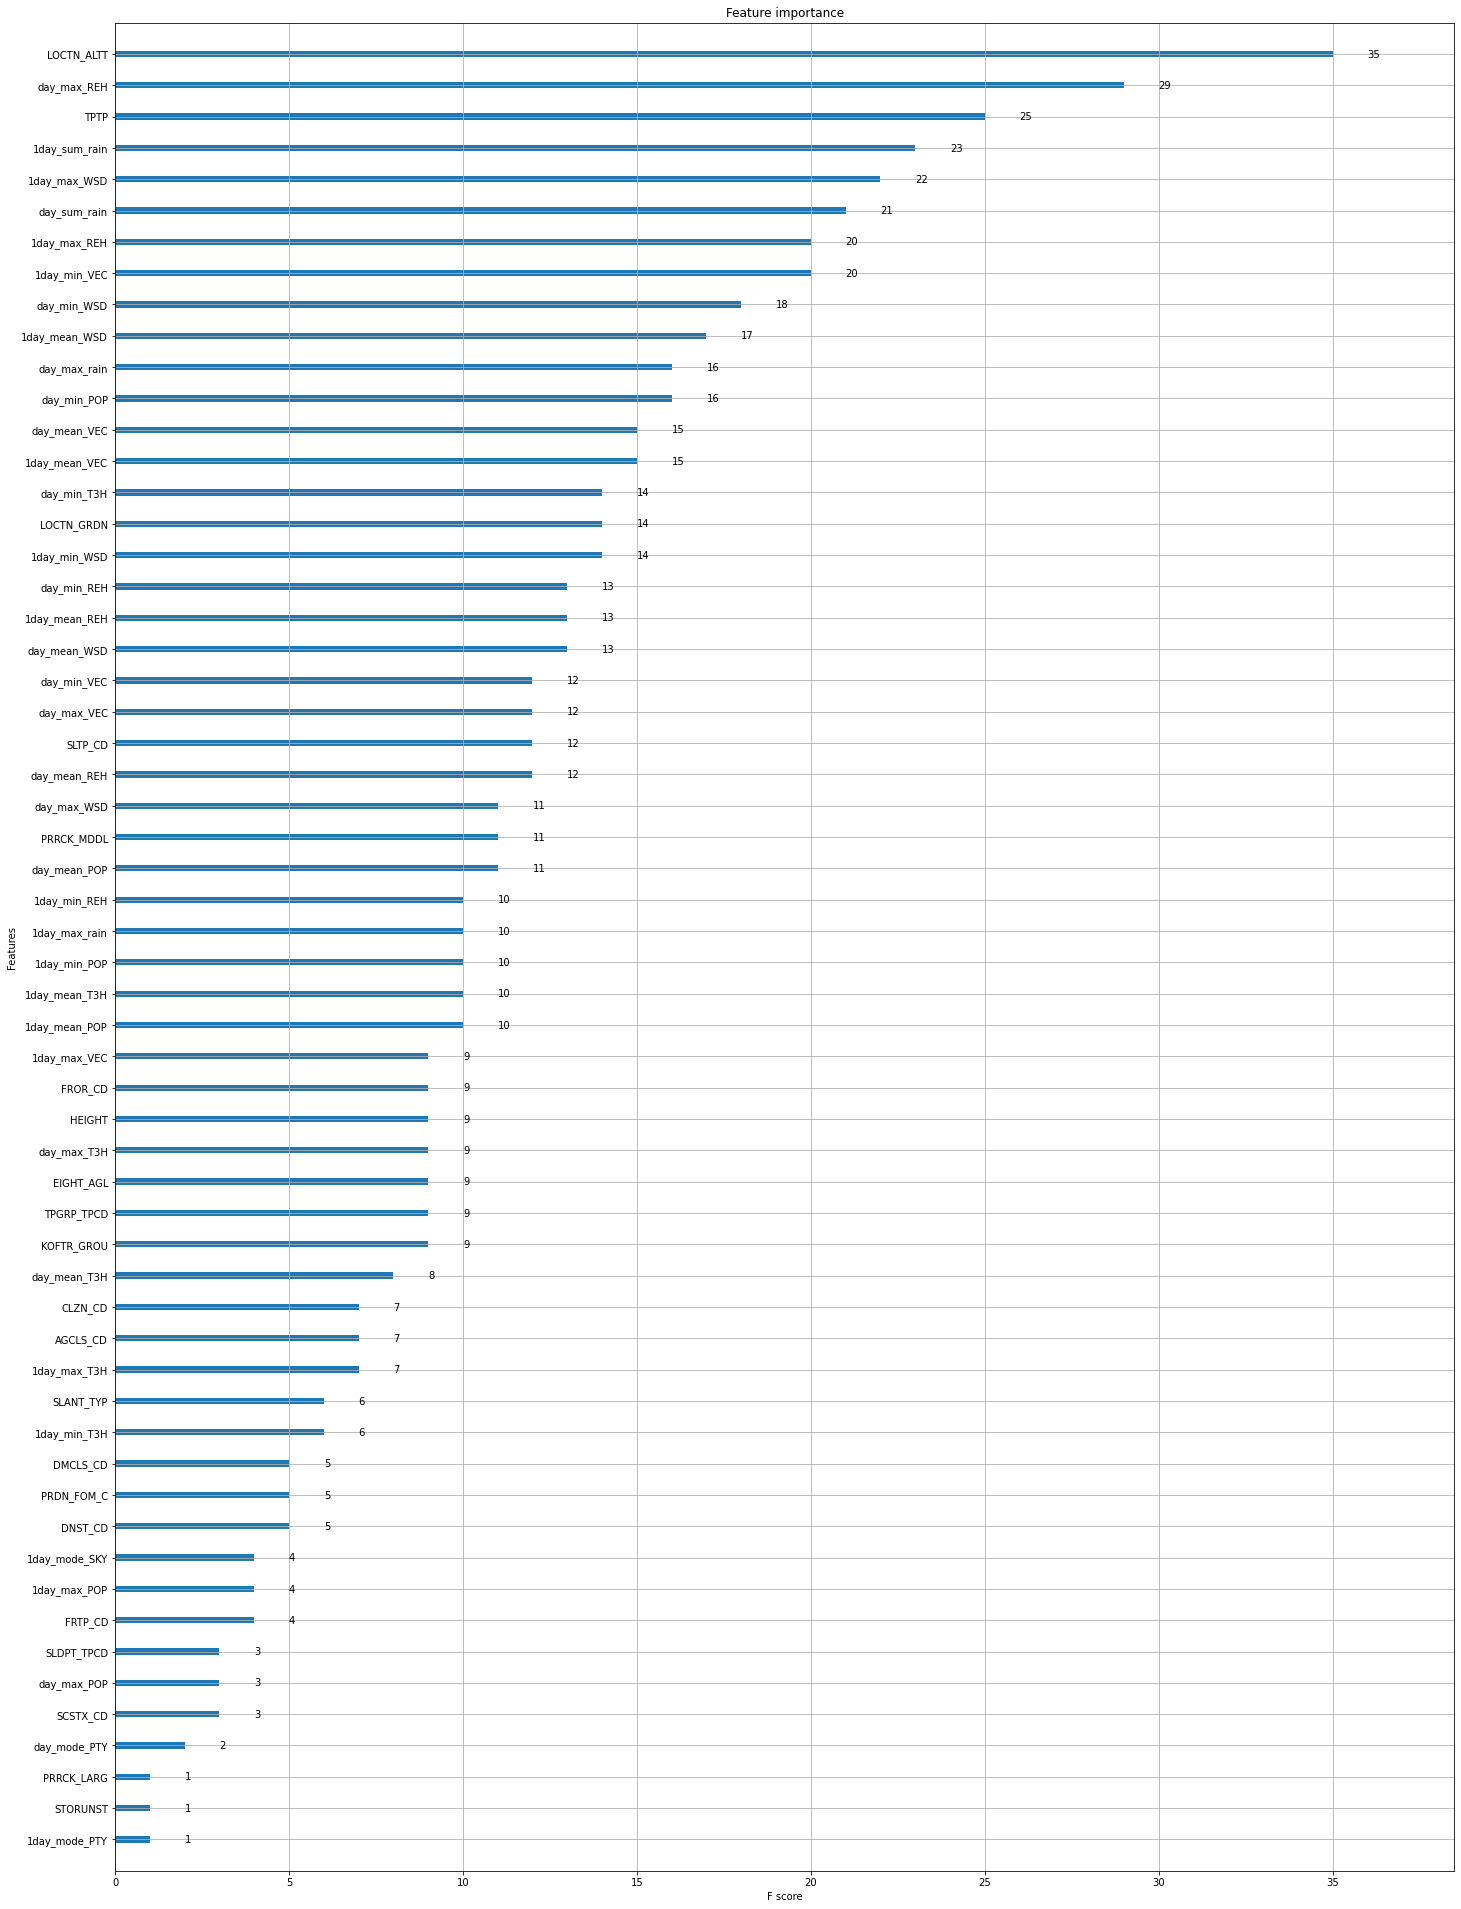

In [58]:
# model6
params = {'max_depth': 6,
         'eta': 0.2921,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.9312,
         'colsample_bytree':0.459 ,
         'min_child_weight': 5.884,
         'subsample': 0.9214
         }
num_rounds = 500

wlist = [(dtrain6, 'train'),(dtest6, 'eval')]
xgb_ab6 =xgb.train(params = params, dtrain=dtrain6, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab6, ax=ax)

In [59]:
# model7 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain7 = xgb.DMatrix(data=X_resampled7, label=y_resampled7)
dtest7 = xgb.DMatrix(data=X_test7, label=y_test7)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain7, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9964   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9957   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9956   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9939   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9963   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9951   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9968   |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.9966   |  0.4647   |  0.179    |  0.2843   |  6.403    |  6.741    |  0.8552   |


[00:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61254	eval-logloss:0.62311
[1]	train-logloss:0.54892	eval-logloss:0.56336
[2]	train-logloss:0.49245	eval-logloss:0.51442
[3]	train-logloss:0.44017	eval-logloss:0.46925
[4]	train-logloss:0.39748	eval-logloss:0.43253
[5]	train-logloss:0.36084	eval-logloss:0.39927
[6]	train-logloss:0.33135	eval-logloss:0.37398
[7]	train-logloss:0.30339	eval-logloss:0.34985
[8]	train-logloss:0.28095	eval-logloss:0.32967
[9]	train-logloss:0.26087	eval-logloss:0.31323
[10]	train-logloss:0.24170	eval-logloss:0.29750
[11]	train-logloss:0.22345	eval-logloss:0.28110
[12]	train-logloss:0.20932	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

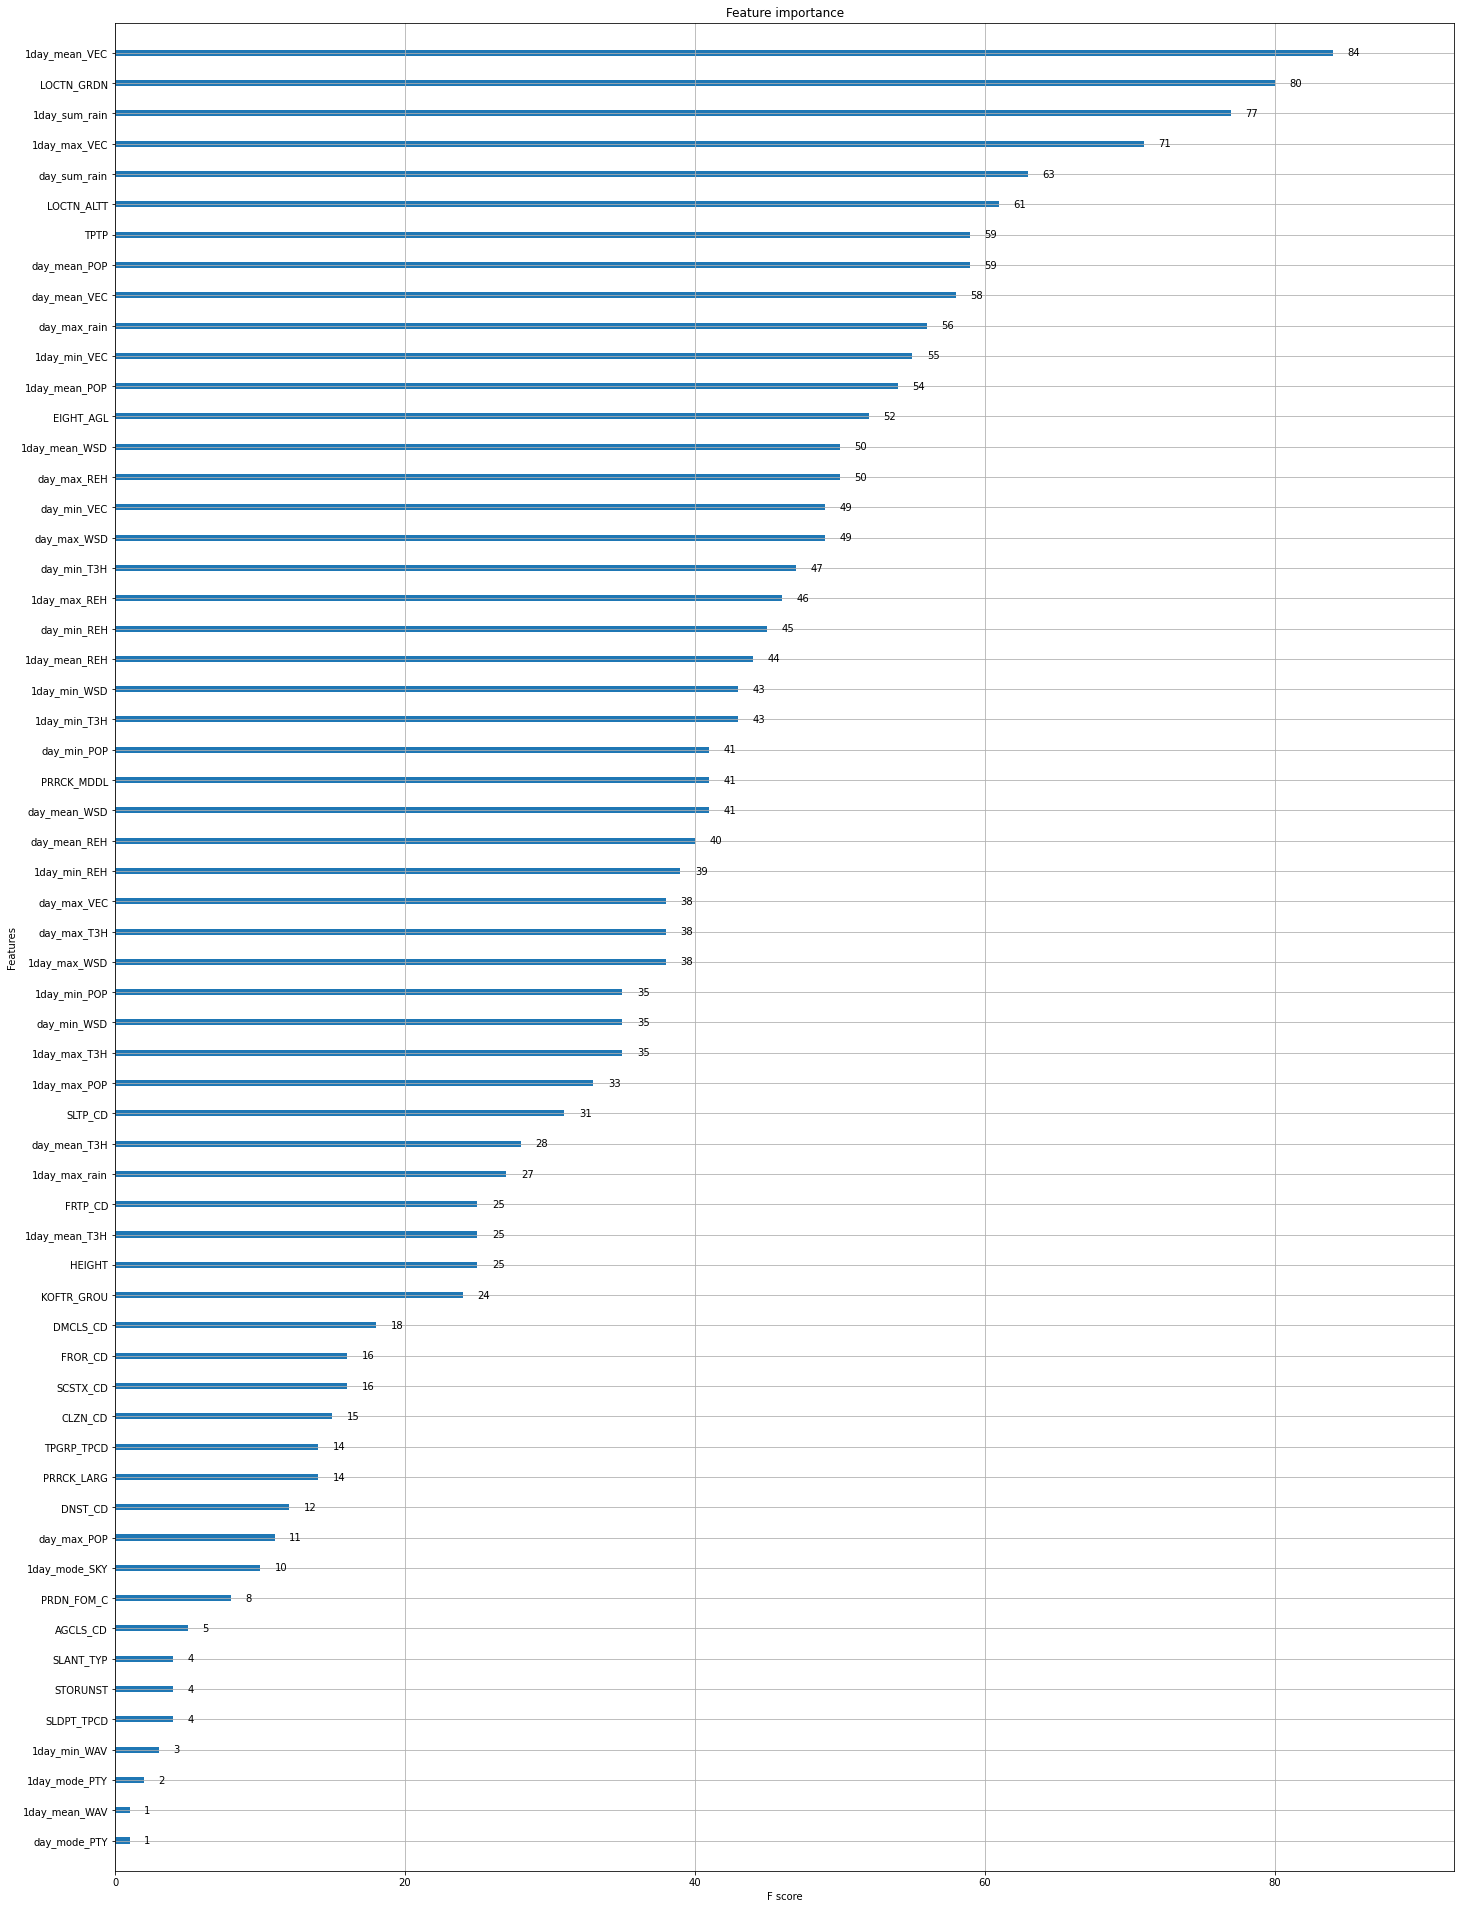

In [60]:
# model7
params = {'max_depth': 7,
         'eta': 0.1246,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.1202,
         'colsample_bytree':0.3925,
         'min_child_weight': 6.22,
         'subsample': 0.8534
         }
num_rounds = 500

wlist = [(dtrain7, 'train'),(dtest7, 'eval')]
xgb_ab7 =xgb.train(params = params, dtrain=dtrain7, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab7, ax=ax)

In [61]:
# model8 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain8 = xgb.DMatrix(data=X_resampled8, label=y_resampled8)
dtest8 = xgb.DMatrix(data=X_test8, label=y_test8)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain8, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9971   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9964   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9965   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9935   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9968   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9946   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9972   |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.9972   |  0.4582   |  0.1592   |  0.2589   |  6.422    |  6.411    |  0.8623   |


[00:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61532	eval-logloss:0.62367
[1]	train-logloss:0.54976	eval-logloss:0.56138
[2]	train-logloss:0.49360	eval-logloss:0.50950
[3]	train-logloss:0.44903	eval-logloss:0.46993
[4]	train-logloss:0.40422	eval-logloss:0.42752
[5]	train-logloss:0.37127	eval-logloss:0.39784
[6]	train-logloss:0.34446	eval-logloss:0.37432
[7]	train-logloss:0.31666	eval-logloss:0.35076
[8]	train-logloss:0.29353	eval-logloss:0.32872
[9]	train-logloss:0.27240	eval-logloss:0.31142
[10]	train-logloss:0.25301	eval-logloss:0.29407
[11]	train-logloss:0.23486	eval-logloss:0.27814
[12]	train-logloss:0.21939	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

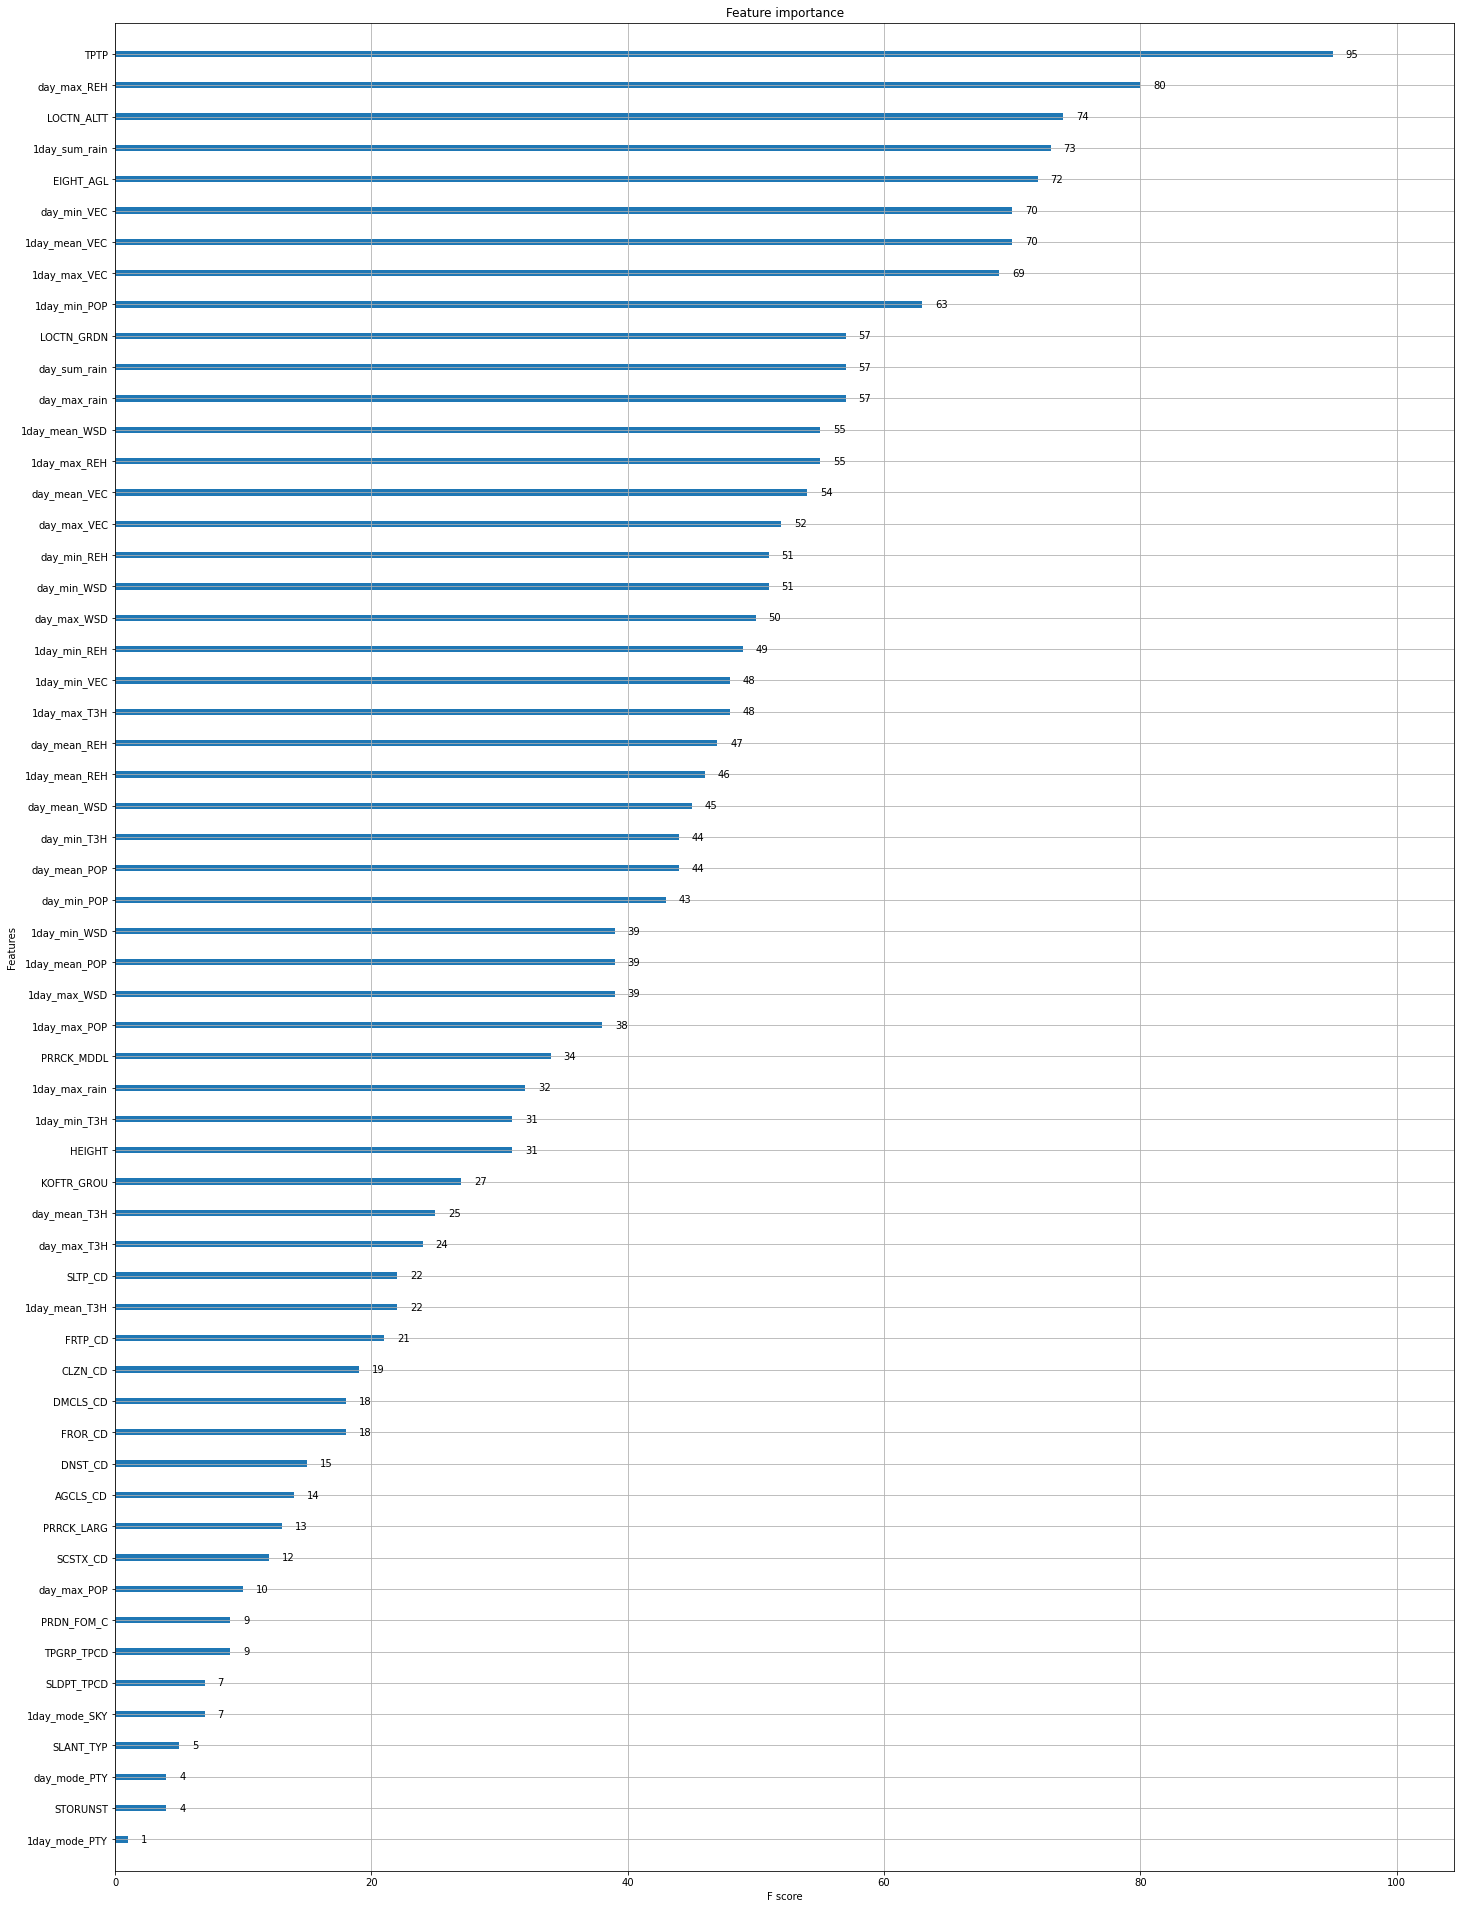

In [62]:
# model8
params = {'max_depth': 7,
         'eta': 0.1246,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.1202,
         'colsample_bytree':0.3925,
         'min_child_weight': 6.22,
         'subsample': 0.8534
         }
num_rounds = 500

wlist = [(dtrain8, 'train'),(dtest8, 'eval')]
xgb_ab8 =xgb.train(params = params, dtrain=dtrain8, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab8, ax=ax)

In [63]:
# model9 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain9 = xgb.DMatrix(data=X_resampled9, label=y_resampled9)
dtest9 = xgb.DMatrix(data=X_test9, label=y_test9)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain9, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9963   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9957   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9957   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9926   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9961   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9938   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9963   |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.996    |  0.3002   |  0.1209   |  0.1746   |  6.925    |  6.254    |  0.856    |


[00:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.57525	eval-logloss:0.58612
[1]	train-logloss:0.48492	eval-logloss:0.50587
[2]	train-logloss:0.41150	eval-logloss:0.43819
[3]	train-logloss:0.36078	eval-logloss:0.39411
[4]	train-logloss:0.31662	eval-logloss:0.35566
[5]	train-logloss:0.27985	eval-logloss:0.32372
[6]	train-logloss:0.25017	eval-logloss:0.29572
[7]	train-logloss:0.22623	eval-logloss:0.27618
[8]	train-logloss:0.20641	eval-logloss:0.25988
[9]	train-logloss:0.19316	eval-logloss:0.24883
[10]	train-logloss:0.17791	eval-logloss:0.23584
[11]	train-logloss:0.16384	eval-logloss:0.22545
[12]	train-logloss:0.15060	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

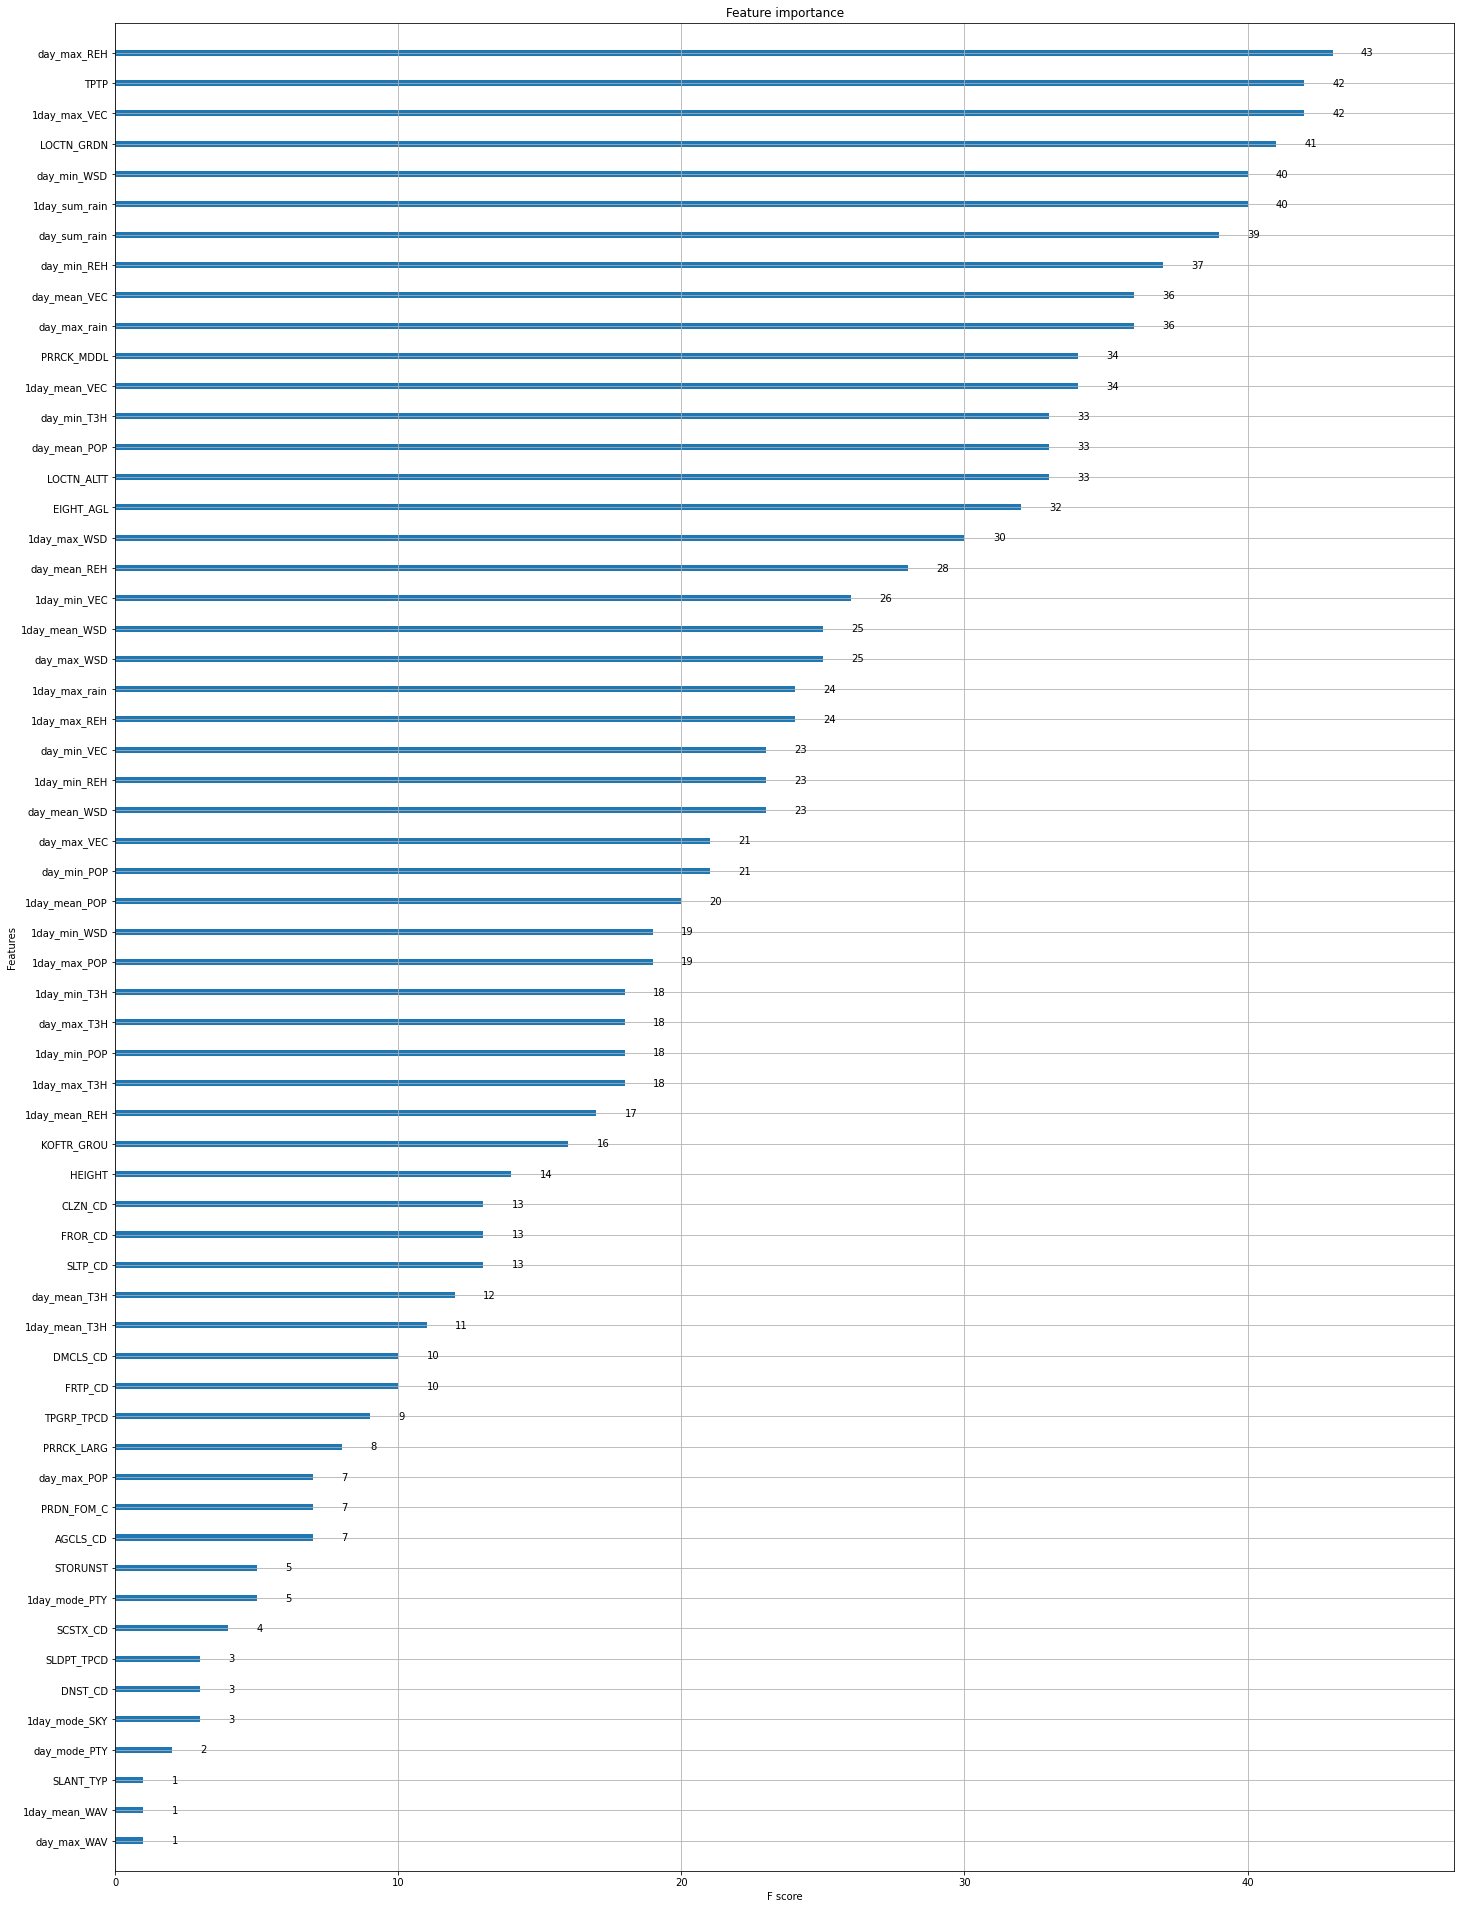

In [64]:
# model9
params = {'max_depth': 7,
         'eta': 0.2062,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.1336,
         'colsample_bytree':0.4533,
         'min_child_weight': 8.356,
         'subsample': 0.7943
         }
num_rounds = 500

wlist = [(dtrain9, 'train'),(dtest9, 'eval')]
xgb_ab9 =xgb.train(params = params, dtrain=dtrain9, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab9, ax=ax)

In [65]:
# model10 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

dtrain10 = xgb.DMatrix(data=X_resampled10, label=y_resampled10)
dtest10 = xgb.DMatrix(data=X_test10, label=y_test10)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'logloss',
              'objective':'binary:logistic',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain10, num_boost_round=100, nfold=3, metrics = 'auc')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return cv_result['test-auc-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.9971   |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        |  0.9968   |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        |  0.9966   |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        |  0.9938   |  0.6086   |  0.1274   |  0.6461   |  3.649    |  8.542    |  0.8785   |
|  5        |  0.9968   |  0.4533   |  0.2062   |  0.1336   |  6.928    |  8.356    |  0.7943   |
|  6        |  0.9951   |  0.6635   |  0.1026   |  0.6155   |  4.652    |  8.967    |  0.8273   |
|  7        |  0.9972   |  0.3925   |  0.1246   |  0.1202   |  6.895    |  6.22     |  0.8534   |
|  8        |  0.997    |  0.3002   |  0.1209   |  0.1746   |  6.925    |  6.254    |  0.856    |


[00:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "early_stopings" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.61713	eval-logloss:0.62430
[1]	train-logloss:0.54848	eval-logloss:0.55797
[2]	train-logloss:0.49306	eval-logloss:0.50799
[3]	train-logloss:0.44773	eval-logloss:0.46635
[4]	train-logloss:0.40297	eval-logloss:0.42607
[5]	train-logloss:0.36908	eval-logloss:0.39667
[6]	train-logloss:0.34121	eval-logloss:0.37143
[7]	train-logloss:0.31495	eval-logloss:0.34952
[8]	train-logloss:0.29135	eval-logloss:0.32682
[9]	train-logloss:0.27294	eval-logloss:0.31025
[10]	train-logloss:0.25309	eval-logloss:0.29303
[11]	train-logloss:0.23739	eval-logloss:0.27926
[12]	train-logloss:0.22212	eval-logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

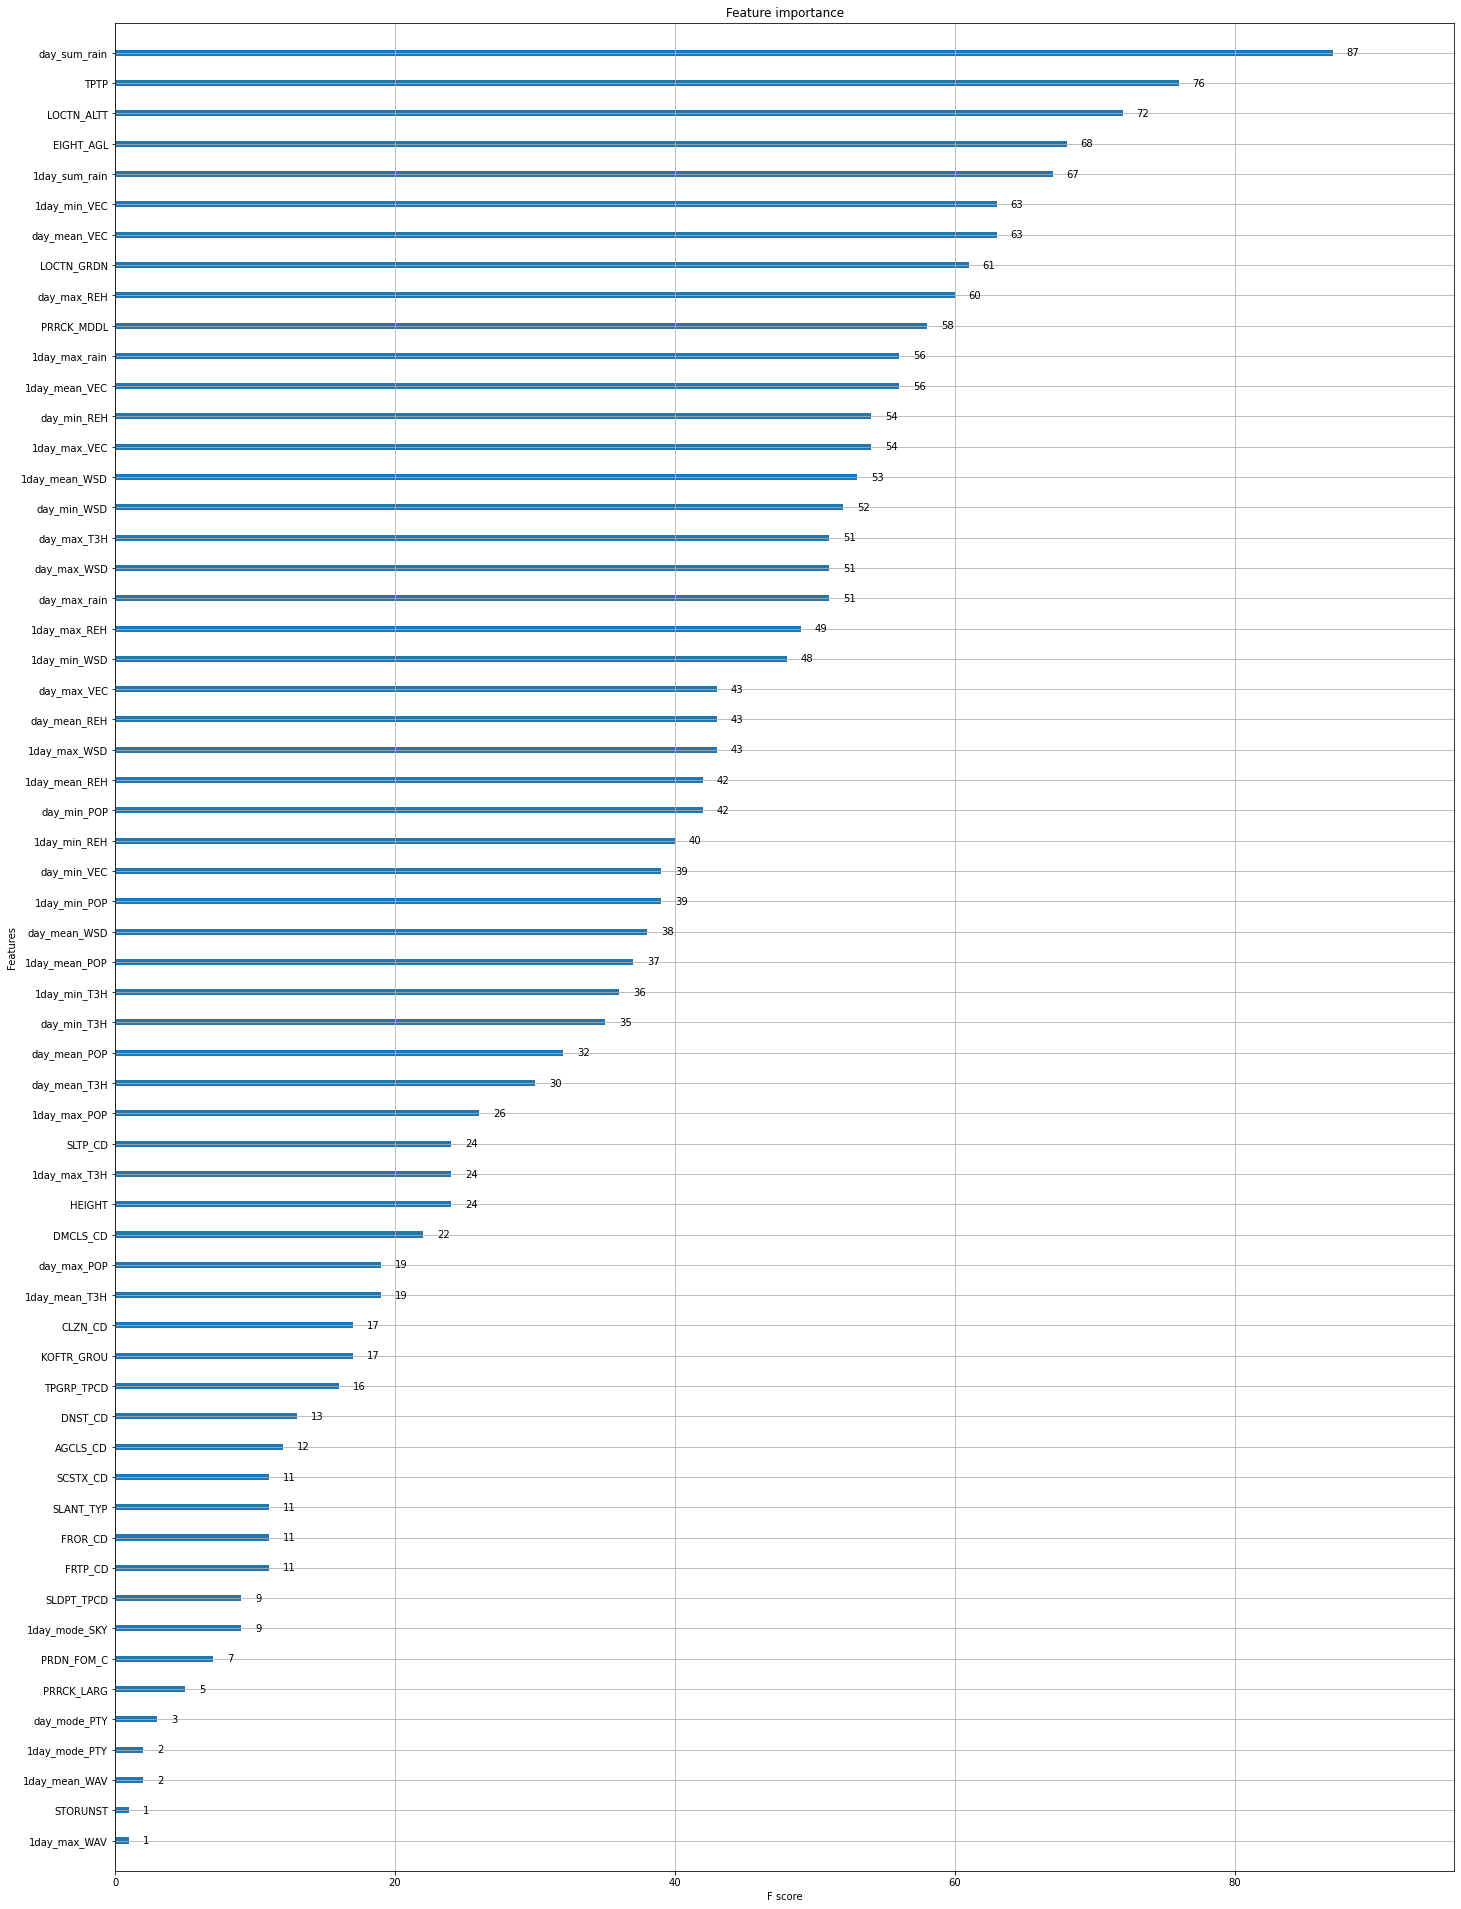

In [66]:
# model10
params = {'max_depth': 7,
         'eta': 0.1246,
         'objective':'binary:logistic',
         'eval_metric': 'logloss',
         'early_stopings':10,
         'gamma': 0.1202,
         'colsample_bytree':0.3925,
         'min_child_weight': 6.22,
         'subsample': 0.8534
         }
num_rounds = 500

wlist = [(dtrain10, 'train'),(dtest10, 'eval')]
xgb_ab10 =xgb.train(params = params, dtrain=dtrain10, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)



from xgboost import plot_importance # 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_ab10, ax=ax)

In [67]:
test = xgb.DMatrix(data=test_1)
xgb_predict1 = xgb_ab1.predict(test)

In [68]:
test = xgb.DMatrix(data=test_1)
xgb_predict2 = xgb_ab2.predict(test)

In [69]:
test = xgb.DMatrix(data=test_1)
xgb_predict3 = xgb_ab3.predict(test)

In [70]:
test = xgb.DMatrix(data=test_1)
xgb_predict4 = xgb_ab4.predict(test)

In [71]:
test = xgb.DMatrix(data=test_1)
xgb_predict5 = xgb_ab5.predict(test)

In [72]:
test = xgb.DMatrix(data=test_1)
xgb_predict6 = xgb_ab6.predict(test)

In [73]:
test = xgb.DMatrix(data=test_1)
xgb_predict7 = xgb_ab7.predict(test)

In [74]:
test = xgb.DMatrix(data=test_1)
xgb_predict8 = xgb_ab8.predict(test)

In [75]:
test = xgb.DMatrix(data=test_1)
xgb_predict9 = xgb_ab9.predict(test)

In [76]:
test = xgb.DMatrix(data=test_1)
xgb_predict10 = xgb_ab10.predict(test)

In [77]:
preds1 = [ 1 if x > 0.5 else 0 for x in xgb_predict1 ]

In [78]:
preds2 = [ 1 if x > 0.5 else 0 for x in xgb_predict2 ]

In [79]:
preds3 = [ 1 if x > 0.5 else 0 for x in xgb_predict3 ]

In [80]:
preds4 = [ 1 if x > 0.5 else 0 for x in xgb_predict4 ]

In [81]:
preds5 = [ 1 if x > 0.5 else 0 for x in xgb_predict5 ]

In [82]:
preds6 = [ 1 if x > 0.5 else 0 for x in xgb_predict6 ]

In [83]:
preds7 = [ 1 if x > 0.5 else 0 for x in xgb_predict7 ]

In [84]:
preds8 = [ 1 if x > 0.5 else 0 for x in xgb_predict8 ]

In [85]:
preds9 = [ 1 if x > 0.5 else 0 for x in xgb_predict9 ]

In [86]:
preds10 = [ 1 if x > 0.5 else 0 for x in xgb_predict10 ]

In [87]:
xgb_pred1=pd.DataFrame(preds1, columns= ['col1'])

In [88]:
xgb_pred2=pd.DataFrame(preds2, columns= ['col2'])

In [89]:
xgb_pred3=pd.DataFrame(preds3, columns= ['col3'])

In [90]:
xgb_pred4=pd.DataFrame(preds4, columns= ['col4'])

In [91]:
xgb_pred5=pd.DataFrame(preds5, columns= ['col5'])

In [92]:
xgb_pred6=pd.DataFrame(preds6, columns= ['col6'])

In [93]:
xgb_pred7=pd.DataFrame(preds7, columns= ['col7'])

In [94]:
xgb_pred8=pd.DataFrame(preds8, columns= ['col8'])

In [95]:
xgb_pred9=pd.DataFrame(preds9, columns= ['col9'])

In [96]:
xgb_pred10=pd.DataFrame(preds10, columns= ['col10'])

In [97]:
xgb_pred1['col1'].value_counts()

0    3234
1     176
Name: col1, dtype: int64

In [98]:
xgb_pred2['col2'].value_counts()

0    3207
1     203
Name: col2, dtype: int64

In [99]:
xgb_pred3['col3'].value_counts()

0    3198
1     212
Name: col3, dtype: int64

In [100]:
xgb_pred4['col4'].value_counts()

0    3211
1     199
Name: col4, dtype: int64

In [101]:
xgb_pred5['col5'].value_counts()

0    3184
1     226
Name: col5, dtype: int64

In [102]:
xgb_pred6['col6'].value_counts()

0    3184
1     226
Name: col6, dtype: int64

In [103]:
xgb_pred7['col7'].value_counts()

0    3299
1     111
Name: col7, dtype: int64

In [104]:
xgb_pred8['col8'].value_counts()

0    3264
1     146
Name: col8, dtype: int64

In [105]:
xgb_pred9['col9'].value_counts()

0    3172
1     238
Name: col9, dtype: int64

In [106]:
xgb_pred10['col10'].value_counts()

0    3228
1     182
Name: col10, dtype: int64

In [107]:
xgb_pred=xgb_pred1.join(xgb_pred2, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred3, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred4, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred5, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred6, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred7, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred8, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred9, how= 'inner')
xgb_pred=xgb_pred.join(xgb_pred10, how= 'inner')
xgb_pred['sum']=xgb_pred['col1']+xgb_pred['col2']+xgb_pred['col3']+xgb_pred['col4']+xgb_pred['col5']+xgb_pred['col6']+xgb_pred['col7']+xgb_pred['col8']+xgb_pred['col9']+xgb_pred['col10']

In [108]:
xgb_pred['1day_yn'] = np.where((xgb_pred['sum']>=4), 1,0)

In [109]:
xgb_pred['1day_yn'].value_counts()

0    3218
1     192
Name: 1day_yn, dtype: int64

In [110]:
sub_1=test_id_1.join(xgb_pred, how= 'inner')

In [111]:
sub_1.to_csv('xgb_sub1.csv', index=False, encoding='CP949')